# Project Overview

## PROJECT GOAL:

* **Use President Trump's tweets (NLP and other features) to predict fluctuations in the stock market (using S&P 500 as index).**

    
### Data to Use:

* All Donald Trump tweets from inaugaration day 2017 to today (for now) - 06/20/19

    *          Extracted from http://www.trumptwitterarchive.com/
*     Minute-resolution data for the S&P500 covering the same time period.

    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
## MAJOR REFERENCES / INSPIRATION / PRIOR WORK IN FIELD:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - [Evernote Summary Notes Link](https://www.evernote.com/l/AAoL1CyhPV1GoIzSgq59GO10x6xfEeVDo5s/)

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)
    - [Evernote Summary](https://www.evernote.com/l/AApvQ8Xh8b9GBLhrD0m8w4H1ih1oVM8wkEw/)


## OUTLINE FOR DATA TO PRODUCE & MODEL FOR FINAL PROJECT:

### TWITTER DATA:

* [ENGINEER FEATURES] **Extract features from Trump's tweets: perform the NLP analysis to generate the features about his tweets to use in final model**

    * [x] Tweet sentiment score
    * [ ] Tweet frequency per timebin
    * [x] upper-to-lowercase-ratio
    * [x] retweet-count
    * [x] favorite-count
    
* [PREDICTIVE MODEL] **Generate Binary Stock Market Predictions based on Trump's Tweets.**

    * [ ] Create a neural network model like the Stanford guys, where my model JUST uses the content of trump's tweets with word embeddings and a binary label (-1, 0,1) for direction of stock market change at a fixed time delta (they did 5 mins, I will do 1 hour) [ See reference #1 - stanford poster]
  



### STOCK MARKET DATA (S&P 500):

* [ENGINEER FEATURES] **Extract features about the stock data -calculate the technical indices for the S&P 500 discussed in his article.**  [ see reference #2 - blog post ]

    * [x] 7 days moving average 
    * [x]  21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    * (Maybe) FFT / time series decomp for trend lines
    
* [PREDICTIVE MODEL] **Generate stock price predictions based only historical data using....**

    * [ ] an ARIMA model[?]
    * [ ] a FB Prophet model[?] 
    * [ ] an LSTM neural network like other blog post?  [!!!] [Predicting the Stock Market Using Machine Learning and Deep Learning](https://www.evernote.com/l/AAq1azRmt2dANq_Oye-MBZQr-OU5lA5APl8/)
    
### FINAL MODEL - FEED ALL ABOVE FEATURES INTO:

- **Plan A: NEURAL NETWORK *REGRESSION* MODEL TO PREDICT *ACTUAL S&P 500 PRICE* AT 1 HOUR-1 DAY FOLLOWING TWEETS**
    - Final Model Target is based more on blog post's construction (ref#2), but takes output of model like ref#1
    
    <img src="https://raw.githubusercontent.com/jirvingphd/dsc-5-capstone-project-online-ds-ft-021119/master/figures/annotated_GAN_for_stock_market.jpeg" width=1000>
    
- **PLAN B: NEURAL NETWORK *BINARY CLASSIFICATION*  MODEL TO PREDICT THE *DIRECTION OF CHANGE FOR S&P 500 PRICE* AT 1 HOUR - 1 DAY FOLLOWING TWEETS**
    - Final Model Target is based on stanford poster's methods/goal. (ref #1)




## DATA ANALYSIS DETAILS AND Equations/Code 

### Technical Indicators - Explanation & Equations






* 7 and 21 day moving averages 
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
* MACD(Moving Average Convergence Divergence)

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
- **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

- **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


- **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $V$ = Latest Price
        - $V_x$ = Closing Price
        - $x$ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```



###  STOCK DATA INFO - S&P500

- Q: What is the format of your aggregate bid/ask data?
    - **The order of the fields in our aggregate bid/ask files is: <br>Date, Time, BidOpen, BidHigh, BidLow, BidClose, AskOpen, AskHigh, AskLow, AskClose**

    - The format is very similar to our standard one minute and higher interval files which are constructed by aggregating the execution price and volume. The difference here is that instead of using execution price we use "national best bid and offer" (NBBO) prices to get their open, high, low and close prices for any given time interval. Bids and asks in our files are from multiple markets and they represent the best prices or the highest bid and the lowest ask.

    - We record best bid/ask values whenever there is trade activity. Like with our regular tick data, current best bid/ask values are recorded for every trade.

    - A potential usage scenario may include using this data in your analysis to try to simulate the execution price for market orders and to estimate the potential slippage that may occur.

You can download sample aggregate bid/ask data for free from the free historical data section on our Buy web page.

**HELPFUL RESOURCES**
- **Dateime Guide Article:**
    - https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f
- **Getting business day MINUTE resolution**
    - Create minute index, then limit it to business times
        - https://stackoverflow.com/questions/19373759/python-pandas-business-day-range-bdate-range-doesnt-take-1min-freq
    - Try !pip install pandas_market_calendars too

# DEF FUNCTIONS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### DEF PRIOR FUNCTIONS

In [2]:
def quick_table(tuples, col_names=None, caption =None,display_df=True):
    """Accepts a bigram output tuple of tuples and makes captioned table."""
    import pandas as pd
    from IPython.display import display
    if col_names == None:
    
        df = pd.DataFrame.from_records(tuples)
        
    else:
        
        df = pd.DataFrame.from_records(tuples,columns=col_names)
        dfs = df.style.set_caption(caption)
        
        if display_df == True:
            display(dfs)
            
    return df

def compare_word_cloud(text1,label1,text2,label2):
    """Compares the wordclouds from 2 sets of texts"""
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wordcloud1 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text1))
    wordcloud2 = WordCloud(max_font_size=80, max_words=200, background_color='white').generate(' '.join(text2))


    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,15))
    ax[0].imshow(wordcloud1, interpolation='bilinear')
    ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=20)

    ax[1].imshow(wordcloud2, interpolation='bilinear')
    ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=20)

    fig.tight_layout()
    return fig,ax

# Define get_tags_ats to accept a list of text entries and return all found tags and ats as 2 series/lists
def get_tags_ats(text_to_search,exp_tag = r'(#\w*)',exp_at = r'(@\w*)', output='series',show_counts=False):
    """Accepts a list of text entries to search, and a regex for tags, and a regex for @'s.
    Joins all entries in the list of text and then re.findsall() for both expressions.
    Returns a series of found_tags and a series of found_ats.'"""
    import re
    import pandas as pd
    # Create a single long joined-list of strings
    text_to_search_combined = ' '.join(text_to_search)
        
    # print(len(text_to_search_combined), len(text_to_search_list))
    found_tags = re.findall(exp_tag, text_to_search_combined)
    found_ats = re.findall(exp_at, text_to_search_combined)
    
    if output.lower() == 'series':
        found_tags = pd.Series(found_tags, name='tags')
        found_ats = pd.Series(found_ats, name='ats')
        
        if show_counts==True:
            print(f'\t{found_tags.name}:\n{found_tags.value_counts()} \n\n\t{found_ats.name}:\n{found_ats.value_counts()}')
                
    if (output.lower() != 'series') & (show_counts==True):
        raise Exception('output must be set to "series" in order to show_counts')
                       
    return found_tags, found_ats


def clean_text(series,is_tokens=False,return_tokens=False, urls=True, hashtags=True, mentions=True, remove_stopwords=True, verbose=False):
    """Accepts a series/df['column'] and tokenizes, removes urls, hasthtags, and @s using regex before tokenizing and removing stopwrods"""
    import pandas as pd
    import re, nltk
    from nltk.corpus import stopwords
    
    series_cleaned=series.copy()
    
    # Remove URLS
    if urls==True:
        urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
        series_cleaned = series_cleaned.apply(lambda x: urls.sub(' ', x))
            
        if verbose==True:
            print('URLs removed...')
            
    # Remove hashtags
    if hashtags==True:
        hashtags = re.compile(r'(\#\w*)')
        series_cleaned = series_cleaned.apply(lambda x: hashtags.sub(' ', x))
        
        if verbose==True:
            print('Hashtags removed...')
    
    # Remove mentions
    if mentions==True:
        mentions = re.compile(r'(\@\w*)')
        series_cleaned = series_cleaned.apply(lambda x: mentions.sub(' ',x))

        if verbose==True:
            print('Mentions removed...')
    
    
    # Regexp_tokenize stopped words (to keep contractions)
    if is_tokens==False:
        pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
        series_cleaned = series_cleaned.apply(lambda x: nltk.regexp_tokenize(x,pattern))
        if verbose==True:
            print('Text regexp_tokenized...\n')
    
    
    # Filter Out Stopwords
    stopwords_list = []
    from nltk.corpus import stopwords
    import string
    
    # Generate Stopwords List
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['http','https','...','``','co','“','’','‘','”',
                       'rt',"n't","''","RT",'u','s',"'s",'?']#,'@','#']
    stopwords_list += [0,1,2,3,4,5,6,7,8,9]
    stopwords_list +=['RT','rt',';']
     
    if remove_stopwords==True:
        series_cleaned = series_cleaned.apply(lambda x: [w.lower() for w in x if w.lower() not in stopwords_list])
        # for s in range(len(series_cleaned)):
        #     text =[]
        #     text_stopped = []
        #     text = series_cleaned[s]
        #     text_stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
        #     series_cleaned[s]= text_stopped
        
        if verbose==True:
            print('Stopwords removed...')
       
    if return_tokens==False:
        series_cleaned = series_cleaned.apply(lambda x: ' '.join(x))
    
    print('\n')
    return series_cleaned

def train_test_val_split(X,y,test_size=0.20,val_size=0.1):
    """Performs 2 successive train_test_splits to produce a training, testing, and validation dataset"""
    from sklearn.model_selection import train_test_split

    first_split_size = test_size + val_size
    second_split_size = val_size/(test_size + val_size)

    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=first_split_size)

    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=second_split_size)

    return X_train, X_test, X_val, y_train, y_test, y_val


def plot_keras_history(history):
    """Plots the history['acc','val','val_acc','val_loss']"""
    import matplotlib.pyplot as plt
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']
    x = range(1,len(acc)+1)
    
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
    ax[0].plot(x, acc,'b',label='Training Acc')
    ax[0].plot(x, val_acc,'r',label='Validation Acc')
    ax[0].legend()
    ax[1].plot(x, loss,'b',label='Training Loss')
    ax[1].plot(x, val_loss, 'r', label='Validation Loss')
    ax[1].legend()
    plt.show()
    return fig, ax


def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, _  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



def display_random_tweets(df_tokenize,n=5 ,display_cols=['content','text_for_vectors','tokens'], group_labels=[],verbose=True):
    """Takes df_tokenize['text_for_vectors']"""
    import numpy as np
    import pandas as pd 
    from IPython.display import display
    if len(group_labels)==0:

        group_labels = display_cols

    
    random_tweets={}
    # Randomly pick n indices to display from specified col
    idx = np.random.choice(range(len(df_tokenize)), n)
    
    for i in range(len(display_cols)):
        
        group_name = str(group_labels[i])
        random_tweets[group_name] ={}

        # Select column data
        df_col = df_tokenize[display_cols[i]]
        

        tweet_group = {}
        tweet_group['index'] = idx
        
        chosen_tweets = df_col[idx]
        tweet_group['text'] = chosen_tweets

        # print(chosen_tweets)
        if verbose>0:
            with pd.option_context('max_colwidth',300):
                df_display = pd.DataFrame.from_dict(tweet_group)
                display(df_display.style.set_caption(f'Group: {group_name}'))


        random_tweets[group_name] = tweet_group
        
        # if verbose>0:
              
        #     for group,data in random_tweets.items():
        #         print(f'\n\nRandom Tweet for {group:>.{300}}:\n{"---"*20}')

        #         df = random_tweets[group]
        #         display(df)
    if verbose==0:
        return random_tweets
    else:
        return


def reload(mod):
    """Reloads the module from file."""
    from importlib import reload
    import sys
    print(f'Reloading...')
    return  reload(mod)


def process_df_full(df_full, raw_col='content_raw', fill_content_col='content',force=False):
    """Accepts df_full, which contains the raw tweets to process, the raw_col name, the column to fill.
    If force=False, returns error if the fill_content_col already exists.
    Processing Workflow:1) Create has_RT, starts_RT columns. 2) Creates [fill_content_col,`content_min_clean`] cols after removing 'RT @mention:' and urls.
    3) Removes hashtags from fill_content_col and saves hashtags in new col. 4) Removes mentions from fill_content_col and saves to new column."""
    import re
    import pandas as pd
    
    if force==False:
        if fill_content_col in df_full.columns:
            raise Exception(f'{fill_content_col} already exists. To overwrite, set force=True.')


    # # create 'content_raw' column from 'content'
    # df_full[fill_content_col] = df_full['content'].copy()


    # Add has_RT and starts_RT columns
    # Creating columns for tweets that `has_RT` or `starts_RT`
    df_full['has_RT']=df_full[raw_col].str.contains('RT')
    df_full['starts_RT']=df_full[raw_col].str.contains('^RT')


    ## FIRST REMOVE THE RT HEADERS

    # Remove `RT @Mentions` FIRST:
    re_RT = re.compile(r'RT [@]?\w*:')

    # raw_col =  'content_raw'
    check_content_col =raw_col
    fill_content_col = fill_content_col

    df_full['content_starts_RT'] = df_full[check_content_col].apply(lambda x: re_RT.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: re_RT.sub(' ',x))


    ## SECOND REMOVE URLS
    # Remove urls with regex
    urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

    check_content_col = fill_content_col
    fill_content_col = fill_content_col

    # df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: urls.sub(' ',x))

    ## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
    df_full['content_min_clean'] =  df_full[fill_content_col]




    ## REMOVE AND SAVE HASHTAGS, MENTIONS
    # Remove and save Hashtags
    hashtags = re.compile(r'\#\w*')

    check_content_col = fill_content_col
    fill_content_col = fill_content_col

    df_full['content_hashtags'] =  df_full[check_content_col].apply(lambda x: hashtags.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: hashtags.sub(' ',x))


    # Remove and save mentions (@)'s
    mentions = re.compile(r'\@\w*')

    check_content_col = fill_content_col
    fill_content_col = fill_content_col

    df_full['content_mentions'] =  df_full[check_content_col].apply(lambda x: mentions.findall(x))
    df_full[fill_content_col] =  df_full[check_content_col].apply(lambda x: mentions.sub(' ',x))

    return df_full



def load_orig_dataset(root_dir = 'russian-troll-tweets/', ext='.csv'):
    """Accepts a root_dir, finds all files that end with ext and loads into a dataframe."""
    import os
    import pandas as pd
    # root_dir = 'russian-troll-tweets/'
    # os.listdir('russian-troll-tweets/')
    filelist = [os.path.join(root_dir,file) for file in os.listdir(root_dir) if file.endswith(ext)]
    print(f'Loading {len(filelist)} files into dataframe...')
        # Vertically concatenate 
    df = pd.DataFrame()
    for file in filelist:
        df_new = pd.read_csv(file)
        df = pd.concat([df,df_new], axis=0)
    # df.info()

    return df

def ask_user_to_save(df, filename=None,encoding=None, ask=True, skip_saving=False, overwrite=False):
    """Asks user to save df as filename. If no filename specified: filename ='saved_df.csv'
    Set ask=False to save without asking."""
    import os, warnings

    if type(df)=='string':
        raise Exception('First input must be the dataframe to be saved.')
    if skip_saving==True:
        return print(f'Since skip_loading=True, no file was save.')

    if filename==None:
        filename='saved_df.csv'
    
    if ask==True:
        ans = input('Would you like to save the df to a .csv?(y/n):')
    else:
        ans = 'y'
    
    # If ans to save =='y'
    if ans.lower()=='y':

        # Check if the file already exists
        if filename in os.listdir():
        
            if overwrite==False:
                # raise Exception(f"{filename} already exists.")
                return warnings.warn(f"{filename} already exists.")

            if overwrite==True:
                warnings.warn(f"Overwriting {filename}.")

        df.to_csv(filename)
        print(f'{filename} successfully saved.')
    else:
        print('Ok. No file was saved. ')
        

def ask_user_to_load(filename, load_as_global = True ,ask=True, skip_loading=False, index_col=0, encoding=None):
    """Asks user to save df as filename. If no filename specified: filename ='saved_df.csv'
    Set ask=False to save without asking."""
    import os
    import pandas as pd

    
    if skip_loading==True:
        return print(f'Since skip_loading=True, no file was loaded.')
        

    if ask==True:
        ans = input('Would you like to load {filename} to a datafrane?(y/n):')

    else:
        ans = 'y'
        

    # If ans to load =='y'
    if ans.lower()=='y':
        
        if load_as_global == True:
            global df_
            df_ = pd.read_csv(filename, encoding=encoding,index_col=index_col) 
            print(f'{filename} loaded as global variable: "df_"')
            pass
        else:
            df_ = pd.read_csv(filename, encoding=encoding,index_col=index_col) 
            return df_
    else:
        return print('Ok. No file was loaded.')
        

def run_all_checkpoint(skip=False):
    ans = input('Continue running all?(y/n):')
    if ans.lower()=='y':
        return print('OK. Continuing to run...')
    else:
        raise Exception('User requested to stop running.')


## TO CHECK FOR STRINGS IN BOTH DATASETS:
def check_dfs_for_exp_list(df_controls, df_trolls, list_of_exp_to_check):
    df_resample = df_trolls
    for exp in list_of_exp_to_check:
    #     exp = '[Pp]eggy'
        print(f'For {exp}:')
        print(f"\tControl tweets: {len(df_controls.loc[df_controls['content_min_clean'].str.contains(exp)])}")
        print(f"\tTroll tweets: {len(df_resample.loc[df_resample['content_min_clean'].str.contains(exp)])}\n")
              
# list_of_exp_to_check = ['[Pp]eggy','[Mm]exico','nasty','impeachment','[mM]ueller']
# check_dfs_for_exp_list(df_controls, df_resample, list_of_exp_to_check=list_of_exp_to_check)


def get_group_texts_tokens(df_small, groupby_col='troll_tweet', group_dict={0:'controls',1:'trolls'}, column='content_stopped'):
    from nltk import regexp_tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    text_dict = {}
    for k,v in group_dict.items():
        group_text_temp = df_small.groupby(groupby_col).get_group(k)[column]
        group_text_temp = ' '.join(group_text_temp)
        group_tokens = regexp_tokenize(group_text_temp, pattern)
        text_dict[v] = {}
        text_dict[v]['tokens'] = group_tokens
        text_dict[v]['text'] =  ' '.join(group_tokens)
            
    print(f"{text_dict.keys()}:['tokens']|['text']")
    return text_dict



def check_df_groups_for_exp(df_full, list_of_exp_to_check, check_col='content_min_clean', groupby_col='troll_tweet', group_dict={0:'Control',1:'Troll'}):      
    """Checks `check_col` column of input dataframe for expressions in list_of_exp_to_check and 
    counts the # present for each group, defined by the groupby_col and groupdict. 
    Returns a dataframe of counts."""
    
    list_of_results = []      

    header_list= ['Term']
    [header_list.append(x) for x in group_dict.values()]
    list_of_results.append(header_list)
    
    for exp in list_of_exp_to_check:
        curr_exp_list = [exp]
        
        for k,v in group_dict.items():
            df_group = df_full.groupby(groupby_col).get_group(k)
            curr_group_count = len(df_group.loc[df_group[check_col].str.contains(exp)])
            curr_exp_list.append(curr_group_count)
        
        list_of_results.append(curr_exp_list)
        
    df_results = bs.list2df(list_of_results, index_col='Term')
    return df_results


###########################################################################

def plot_fit_cloud(troll_cloud,contr_cloud,label1='Troll',label2='Control'):
    import matplotlib.pyplot as plt
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,18))

    ax[0].imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax[0].axis("off")
    ax[0].set_title(label1, fontsize=40)

    ax[1].imshow(contr_cloud, interpolation='bilinear',)
    # ax[1].set_aspect(1.5)
    ax[1].axis("off")
    ax[1].set_title(label2, fontsize=40)
    plt.tight_layout()
    return fig, ax

In [3]:
# !pip install pandas_market_calendars
# # Install GraphViz with apt
# !apt-get install graphviz -y

# import pandas_market_calendars as pmc

### DEF - FILE & VAR MANAGEMENT FUNCTIONS


In [4]:
##################### FILE & VAR MANAGEMENT FUNCTIONS #####################

# def mount_google_drive(force_remount=True):
#     from google.colab import drive
#     print('drive_filepath="drive/My Drive/"')
#     return drive.mount('/content/drive', force_remount=force_remount)


# def check_for_google_drive(mount_if_not=True):
#     import os
#     # Check if google drive is already mounted
#     x=[]
#     try: os.listdir('drive/My Drive/')
#     except FileNotFoundError: x=None

#     # if GDrive not mounted, mount it
#     if x==None:
#         print('Drive not mounted.')
#         if mount_if_not==False:
#             return False
#         else:
#             print('Mounting google drive...')
#             return mount_google_drive()
#     else:
#         return True

# def cd_project_folder(folder_path ='/content/drive/My Drive/Colab Notebooks/Mod 5 Project/data/'):
#     import os
#     return os.chdir(folder_path),print('Cur Dir:', os.getcwd())
#     # print('Dir Contents:\n',os.listdir())
    
    
#################### GENERAL HELPER FUNCTIONS #####################
def is_var(name):
    x=[]
    try: eval(name)
    except NameError: x = None
        
    if x is None:
        return False
    else:
        return True    

In [5]:
## SAVE AND LOAD STOCK MARKET MINUTE DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# mount_google_drive()

# cd_project_folder()
# import os 
# os.getcwd()

### DEF TIMESERIES TESTS AND VISUALS

In [6]:

############### TIMESERIES TESTS AND VISUALS ###############

def plot_time_series(stocks_df, freq=None, fill_method='ffill',figsize=(12,4)):
    
    df = stocks_df.copy()
    df.fillna(method=fill_method, inplace=True)
    df.dropna(inplace=True)
    
    if (df.index.freq==None) & (freq == None):
        xlabels=f'Time'
    
    elif (df.index.freq==None) & (freq != None):
        df = df.asfreq(freq)
        df.fillna(method=fill_method, inplace=True)
        df.dropna(inplace=True)
        xlabels=f'Time - Frequency = {freq}'

    else:
        xlabels=f'Time - Frequency = {df.index.freq}'
        
    ylabels="Price"

    raw_plot = df.plot(figsize=figsize)
    raw_plot.set_title('Stock Bid Closing Price ')
    raw_plot.set_ylabel(ylabels)
    raw_plot.set_xlabel(xlabels)
    
    


### DEF TIMEINDEX FUNCTIONS

In [7]:
#################### TIMEINDEX FUNCTIONS #####################
def get_day_window_size_from_freq(dataset):#, freq='CBH'):
    
    if dataset.index.freq == custom_BH_freq():
        return 7
    
    if dataset.index.freq=='T':
        day_window_size = 1440
    elif dataset.index.freq=='BH':
        day_window_size = 8
    elif dataset.index.freq=='CBH':
        day_window_size = 7
    elif dataset.index.freq=='B':
        day_window_size=1
    elif dataset.index.freq=='D':
        day_window_size=1
        
    else:
        raise Exception('dataset freq=None')
        
    return day_window_size
    

def custom_BH_freq():
    import pandas as pd
    CBH = pd.tseries.offsets.CustomBusinessHour(start='09:30',end='16:30')
    return CBH
    
    
def  set_timeindex_freq(ive_df, col_to_fill=None, freq='CBH',fill_method='ffill',
                        verbose=3): #set_tz=True,
    
    import pandas as pd
    import numpy as np
    
    
    if verbose>1:
        # print(f"{'Index When:':>{10}}\t{'Freq:':>{20}}\t{'Index Start:':>{40}}\t{'Index End:':>{40}}")
        print(f"{'Index When:'}\t{'Freq:'}\t{'Index Start'}\t\t{'Index End:'}")
        print(f"Pre-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")
        
    
    if freq=='CBH':
        freq=custom_BH_freq()
#         start_idx = 
        
    # Change frequency to freq
    ive_df = ive_df.asfreq(freq,)#'min')
    
    #     # Set timezone
    #     if set_tz==True:
    #         ive_df.tz_localize()
    #         ive_df.index = ive_df.index.tz_convert('America/New_York')
    
    # Report Success / Details
    if verbose>1:
        print(f"Post-Change\t{ive_df.index.freq}\t{ive_df.index[0]}\t{ive_df.index[-1]}")


    ## FILL AND TRACK TIMEPOINTS WITH MISSING DATA    
    
    # Helper Function for adding column to track the datapoints that were filled
    def check_null_times(x):
        import numpy as np
        if np.isnan(x):
            return True
        else:
            return False

    ## CREATE A COLUMN TO TRACK ROWS TO BE FILLED
    # If col_to_fill provided, use that column to create/judge ive_df['filled_timebin'] 
    if col_to_fill!=None:
        ive_df['filled_timebin'] = ive_df[col_to_fill].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()
        
    # if not provided, use all columns and sum results
    elif col_to_fill == None:
        # Prefill fol with 0's
        ive_df['filled_timebin']=0
        
        # loop through all columns and add results of check_null_times from each loop
    for col in ive_df.columns:
        if ive_df[col].dtypes=='float64':
            #ive_df['filled_timebin'] = ive_df[target_col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any()
            curr_filled_timebin_col = ive_df[col].apply(lambda x: check_null_times(x))#True if ive_df.isna().any() 

            # add results
            ive_df['filled_timebin'] +=  curr_filled_timebin_col
            
    ive_df['filled_timebin'] = ive_df['filled_timebin'] >0
            
    ## FILL IN NULL VALUES
    ive_df.fillna(method=fill_method, inplace=True)

    # Report # filled
    if verbose>0:
        check_fill = ive_df.loc[ive_df['filled_timebin']>0]
        print(f'\nFilled {len(check_fill==True)}# of rows using method {fill_method}')
    
    # Report any remaning null values
    if verbose>0:
        res = ive_df.isna().sum()
        if res.any():
            print(f'Cols with Nulls:')
            print(res[res>0])
        else:
            print('No Remaining Null Values')   
            
    # display header
    if verbose>2:
        display(ive_df.head())
    
    return ive_df


# Helper Function for adding column to track the datapoints that were filled
def check_null_times(x):
    import numpy as np
    if np.isnan(x):
        return True
    else:
        return False

### DEF SEASONAL DECOMPOSITION

In [8]:
######## SEASONAL DECOMPOSITION    
def plot_decomposition(TS, decomposition, figsize=(12,8),window_used=None):
    """ Plot the original data and output decomposed components"""
    
    # Gather the trend, seasonality and noise of decomposed object
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    fontdict_axlabels = {'fontsize':12}#,'fontweight':'bold'}
    
    # Plot gathered statistics
    fig, ax = plt.subplots(nrows=4, ncols=1,figsize=figsize)
    
    ylabel = 'Original'
    ax[0].plot(np.log(TS), color="blue")
    ax[0].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    
    ylabel = label='Trend'
    ax[1].plot(trend, color="blue")
    ax[1].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    
    ylabel='Seasonality'
    ax[2].plot(seasonal, color="blue")
    ax[2].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    
    ylabel='Residuals'
    ax[3].plot(residual, color="blue")
    ax[3].set_ylabel(ylabel, fontdict=fontdict_axlabels)
    ax[3].set_xlabel('Time', fontdict=fontdict_axlabels)
    
    # Add title with window 
    if window_used == None:
        plt.suptitle('Seasonal Decomposition', y=1.02)
    else:
        plt.suptitle(f'Seasonal Decomposition - Window={window_used}', y=1.02)
    
    # Adjust aesthetics
    plt.tight_layout()
    
    return ax
    
    
def seasonal_decompose_and_plot(ive_df,col='BidClose',freq='H',
                          fill_method='ffill',window=144,
                         model='multiplicative', two_sided=False,
                               plot_components=True):##WIP:
    """Perform seasonal_decompose from statsmodels.tsa.seasonal.
    Plot Output Decomposed Components"""
    import pandas as pd
    import numpy as np
    from statsmodels.tsa.seasonal import seasonal_decompose


    # TS = ive_df['BidClose'].asfreq('BH')
    TS = pd.DataFrame(ive_df[col])
    TS = TS.asfreq(freq)
    TS[TS==0]=np.nan
    TS.fillna(method='ffill',inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(np.log(TS),freq=window, model=model, two_sided=two_sided)
    
    if plot_components==True:
        ax = plot_decomposition(TS, decomposition, window_used=window)
    
    return decomposition



def stationarity_check(df, col='BidClose',freq=None, day_window_size='infer',
                       days_in_rolling_window=5):
    """From learn.co lesson: use ADFuller Test for Stationary and Plot"""
    
    import matplotlib.pyplot as plt
    TS = df[col].copy()
    
    if freq==None:
        freq=df.index.freq
        
    else:        
        TS = TS.asfreq(freq)
        TS.fillna(method='ffill',inplace=True)
        TS.dropna(inplace=True)
    
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    import numpy as np
    
    # Calculate rolling statistics
    if day_window_size=='infer':
        day_window_size = get_day_window_size_from_freq(TS)
        
    window = day_window_size*days_in_rolling_window
    rolmean = TS.rolling(window = window, center = False).mean()
    rolstd = TS.rolling(window = window, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,4))
    ax[0].set_title('Rolling Mean & Standard Deviation')

    ax[0].plot(TS, color='blue',label='Original')
    ax[0].plot(rolmean, color='red', label='Rolling Mean',alpha =0.6)
    ax[1].plot(rolstd, color='black', label = 'Rolling Std')
    ax[0].legend()
    ax[1].legend()
#     plt.show(block=False)
    plt.tight_layout()
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')
    print('\tIf p<.05 then timeseries IS stationary.')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

### def get_technical_indicators & plot_technical_indicators

In [9]:
def get_technical_indicators(dataset,make_price_from='BidClose'):
    

    dataset['price'] = dataset[make_price_from].copy()
    if dataset.index.freq == custom_BH_freq():
        days = get_day_window_size_from_freq(dataset)#,freq='CBH')
    else:
        days = get_day_window_size_from_freq(dataset)
        
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7*days).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21*days).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['price'].ewm(span=26*days).mean()
#     dataset['12ema'] = pd.ewma(dataset['price'], span=12)
    dataset['12ema'] = dataset['price'].ewm(span=12*days).mean()

    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
#     dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
    dataset['20sd'] = dataset['price'].rolling(20*days).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-days*1
    
    return dataset


In [10]:
def plot_technical_indicators(dataset, last_days=90):
   
    days = get_day_window_size_from_freq(dataset)
    
    fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 6), dpi=100)
#     shape_0 = dataset.shape[0]
#     xmacd_ = shape_0-(days*last_days)
    
    dataset = dataset.iloc[-(days*last_days):, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    ax[0].plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    ax[0].plot(dataset['price'],label='Closing Price', color='b')
    ax[0].plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    ax[0].plot(dataset['upper_band'],label='Upper Band', color='c')
    ax[0].plot(dataset['lower_band'],label='Lower Band', color='c')
    ax[0].fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    ax[0].set_title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    ax[0].set_ylabel('USD')
    ax[0].legend()

#     shape_0 = dataset.shape[0]
#     xmacd_ = shape_0-(days*last_days)
#     # Plot second subplot
#     ax[1].set_title('MACD')
#     ax[1].plot(dataset['MACD'],label='MACD', linestyle='-.')
#     ax[1].hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     ax[1].hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
#     ax[1].plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

#     ax[1].legend()
    plt.delaxes(ax[1])
    plt.show()
    
# plot_technical_indicators(stock_df)#.filter(regex='Bid'))  


### def train_test_split_by_last_days

In [11]:
def train_test_split_by_last_days(stock_df, periods_per_day=7,num_test_days = 90, num_train_days=180,verbose=1, plot=True):
    """Takes the last num_test_days of the time index to use as testing data, and take shte num_Trian_days prior to that date
    as the training data."""
    
    # DETERMINING DAY TO USE TO SPLIT DATA INTO TRAIN AND TEST
    day_freq = periods_per_day
    start_train_day = stock_df.index[-1] - num_train_days*day_freq
    last_day = stock_df.index[-1] - num_test_days*day_freq
    
    train_data = stock_df.loc[start_train_day:last_day]#,'price']
    test_data = stock_df.loc[last_day:]#,'price']
    
    if verbose>0:
        print(f'Data split on index:\t{last_day}.')

    if verbose>1:
        print(f'Train Data Date Range:\t{start_train_day} \t {last_day}.')
        print(f'Test Data Date Range:\t{last_day} \t {stock_df.index[-1]}.')
        print(f'\ttrain_data.shape:\t{train_data.shape}, test_data.shape:{test_data.shape}')
        
    if verbose>1:
        display(train_data.head(3).style.set_caption('Training Data'))
        display(test_data.head(3).style.set_caption('Test Data'))

                
    if plot==True:
        if 'price' in stock_df.columns:
            plot_col ='price'
        elif 'price_labels' in stock_df.columns:
            plot_col = 'price_labels'
        
        train_data[plot_col].plot(label='Training')
        test_data[plot_col].plot(label='Test')
        plt.title('Training and Test Data for S&P500')
        plt.ylabel('Price')
        plt.xlabel('Trading Date/Hour')
        plt.legend();
    
    return train_data, test_data

# train_data, test_data = train_test_split_by_last_days(stock_df)

# LOAD RAW DATASET

In [12]:
# pause

## def load_raw_stock_data_from_txt

In [13]:
##################### DATASET LOADING FUNCTIONS #####################   
def load_raw_stock_data_from_txt(filename='IVE_bidask1min.txt', 
                               folderpath='data/',
                               start_index = '2017-01-23',
                                 clean=False,fill_or_drop_null='drop',fill_method='ffill',
                                 freq='CBH',verbose=2):
    import pandas as pd
    
    # Load in the text file and set headers
    fullfilename= folderpath+filename
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    stock_df = pd.read_csv(fullfilename, names=headers,parse_dates=True)
    
    # Create datetime index
    date_time_index = stock_df['Date']+' '+stock_df['Time']
    date_time_index = pd.to_datetime(date_time_index)
    stock_df.index=date_time_index
    
    # Select only the days after start_index
    stock_df = stock_df[start_index:]
    
    # Remove 0's from BidClose
    if clean==True:
        
        stock_df.loc[stock_df['BidClose']==0] = np.nan
        num_null = stock_df['BidClose'].isna().sum()
        print(f'{num_null} null values to address.')
        
        if fill_or_drop_null=='drop':
            print("Since fill_or_drop_null=drop, dropping null values.")
            stock_df.dropna(subset=['BidClose'],axis=0, inplace=True)
        elif fill_or_drop_null=='fill':
            print(f"Since fill_or_drop_null=fill, using fill_method={fill_method} to fill.")

            stock_df['BidClose'].fillna(method=fill_method, inplace=True)
        
        if verbose>0:
            print(f"Number of 0 values:\n{len(stock_df.loc[stock_df['BidClose']==0])}")
            print(f"Filling 0 values using method = {fill_method}")
            


                  
    # call set_timeindex_freq to specify proper frequency
    if freq!=None:
        # Set the time index .
        stock_df = set_timeindex_freq(stock_df, freq=freq, fill_method = fill_method, verbose=verbose)
                  
    # Display feedback
    if verbose>0:
        display(stock_df.head())
    if verbose>1:
        print(stock_df.index)

    return stock_df



# def load_stock_df_from_csv(filename='ive_sp500_min_data_match_twitter_ts.csv',
    #                            folderpath='data/',
    #                           start_index = '2017-01-23', clean=False,freq='CBH',
    #                            fill_method='ffill',verbose=2):
    #     import os
    #     import pandas as pd

    #     #         check_for_google_drive()

    #     # Check if user provided folderpath to append to filename
    #     if len(folderpath)>0:
    #         fullfilename = folderpath+filename
    #     else:
    #         fullfilename=filename

    #     # load in csv by fullfilename
    #     stock_df = pd.read_csv(fullfilename,index_col=0, parse_dates=True)
    #     stock_df = stock_df[start_index:]
    # #     stock_df = set_timeindex_freq(stock_df,['BidClose'],freq=freq, fill_method=fill_method)

    #     if clean==True:

    #         if verbose>0:
    #             print(f"Number of 0 values:\n{len(stock_df.loc[stock_df['BidClose']==0])}")
    #             print(f"Filling 0 values using method = {fill_method}")

    #         stock_df.loc[stock_df['BidClose']==0] = np.nan
    #         stock_df['BidClose'].fillna(method=fill_method, inplace=True)

    #     if freq!=None:
    #         # Set the time index .
    #         stock_df = set_timeindex_freq(stock_df, freq=freq, fill_method = fill_method, verbose=verbose)


    #     # Display info depending on verbose level
    #     if verbose>0:
    #         display(stock_df.head())

    #     if verbose>1:
    #         print(stock_df.index)

    #     return stock_df   

In [14]:
# pause

10 null values to address.
Since fill_or_drop_null=drop, dropping null values.
Number of 0 values:
0
Filling 0 values using method = ffill

Filled 520# of rows using method ffill
No Remaining Null Values


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,filled_timebin
2017-01-23 09:30:00,01/23/2017,09:30,96.15,96.23,96.15,96.23,96.36,96.36,96.30,96.30,False
2017-01-23 10:30:00,01/23/2017,10:30,95.98,96.00,95.98,96.00,95.99,96.01,95.99,96.01,False
2017-01-23 11:30:00,01/23/2017,11:30,95.91,95.95,95.91,95.94,95.92,95.96,95.92,95.95,False
2017-01-23 12:30:00,01/23/2017,12:30,95.84,95.84,95.84,95.84,95.85,95.85,95.85,95.85,False
2017-01-23 13:30:00,01/23/2017,13:30,95.88,95.88,95.88,95.88,95.89,95.89,95.89,95.89,False


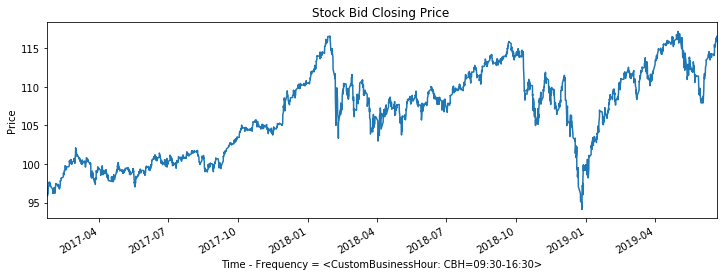

In [15]:
stock_df = load_raw_stock_data_from_txt(filename="IVE_bidask1min.txt", start_index='2017-01-23',
                                        clean=True,fill_or_drop_null='drop', freq='CBH',verbose=1)
plot_time_series(stock_df['BidClose'])

In [16]:
stock_df = get_technical_indicators(stock_df)
print(stock_df.columns)
print(stock_df.isna().sum())
stock_df.head()

Index(['Date', 'Time', 'BidOpen', 'BidHigh', 'BidLow', 'BidClose', 'AskOpen',
       'AskHigh', 'AskLow', 'AskClose', 'filled_timebin', 'price', 'ma7',
       'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band', 'lower_band',
       'ema', 'momentum'],
      dtype='object')
Date                0
Time                0
BidOpen             0
BidHigh             0
BidLow              0
BidClose            0
AskOpen             0
AskHigh             0
AskLow              0
AskClose            0
filled_timebin      0
price               0
ma7                48
ma21              146
26ema               0
12ema               0
MACD                0
20sd              139
upper_band        146
lower_band        146
ema                 0
momentum            0
dtype: int64


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,...,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
2017-01-23 09:30:00,01/23/2017,09:30,96.15,96.23,96.15,96.23,96.36,96.36,96.30,96.30,...,NaN,NaN,96.230000,96.230000,0.000000,NaN,NaN,NaN,96.230000,89.23
2017-01-23 10:30:00,01/23/2017,10:30,95.98,96.00,95.98,96.00,95.99,96.01,95.99,96.01,...,NaN,NaN,96.114368,96.113631,-0.000737,NaN,NaN,NaN,96.057500,89.00
2017-01-23 11:30:00,01/23/2017,11:30,95.91,95.95,95.91,95.94,95.92,95.96,95.92,95.95,...,NaN,NaN,96.055606,96.054371,-0.001235,NaN,NaN,NaN,95.976154,88.94
2017-01-23 12:30:00,01/23/2017,12:30,95.84,95.84,95.84,95.84,95.85,95.85,95.85,95.85,...,NaN,NaN,96.000812,95.998849,-0.001964,NaN,NaN,NaN,95.884250,88.84
2017-01-23 13:30:00,01/23/2017,13:30,95.88,95.88,95.88,95.88,95.89,95.89,95.89,95.89,...,NaN,NaN,95.976116,95.973934,-0.002182,NaN,NaN,NaN,95.881405,88.88


In [17]:
# Remove timepoints without enough time periods for all indicators
na_idx = stock_df.loc[stock_df['upper_band'].isna() == True].index
stock_df = stock_df.loc[na_idx[-1]+1*na_idx.freq:]

print(stock_df.index[[0,-1]])

# Check for null values
res = stock_df.isna().sum()
res[res>0]

DatetimeIndex(['2017-02-20 15:30:00', '2019-06-21 15:30:00'], dtype='datetime64[ns]', freq=None)


Series([], dtype: int64)

In [18]:
save=True
if save==True:
    stock_df.to_csv('data/stock_df_with_tech_indicators_CBH_index.csv')

## Checking for Stationarity and Trends

Results of Dickey-Fuller Test:
	If p<.05 then timeseries IS stationary.
Test Statistic                   -1.689761
p-value                           0.436395
#Lags Used                        0.000000
Number of Observations Used    4263.000000
Critical Value (1%)              -3.431885
Critical Value (5%)              -2.862218
Critical Value (10%)             -2.567131
dtype: float64


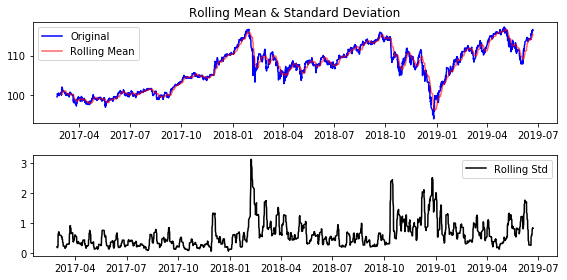

In [19]:
# Check if stationary
stationarity_check(stock_df, freq=custom_BH_freq())

In [20]:
# UDEMY COURSE ALTERNATIVE TO STATIONARITY CHECK
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd 
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [21]:
adf_test(stock_df['price'], title='Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic        -1.689761
p-value                    0.436395
# lags used                0.000000
# observations          4263.000000
critical value (1%)       -3.431885
critical value (5%)       -2.862218
critical value (10%)      -2.567131
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


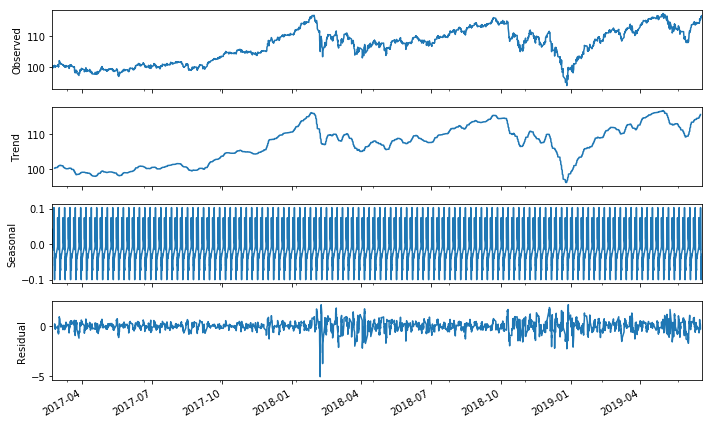

In [22]:
# Adding a seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_df['price'], freq=35)#, freq=custom_BH_freq())

mpl.rcParams['figure.figsize'] = (10,6)
result.plot();

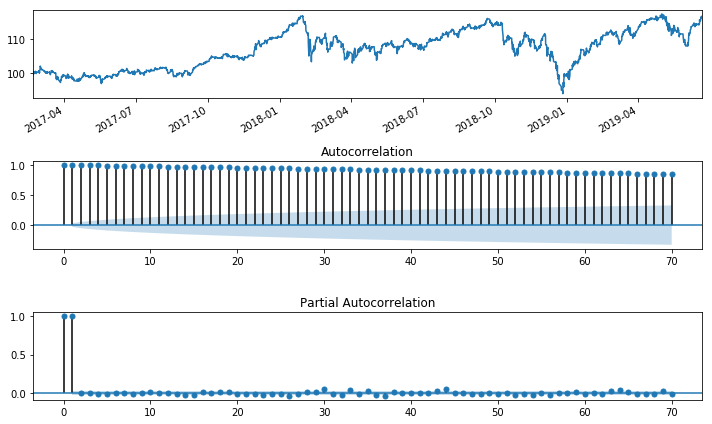

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
test_df = stock_df['price']

fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,6))

test_df.plot(ax=ax[0])
# df2.plot(ax=ax[0,1])

num_lags = 70
plot_acf(test_df,ax=ax[1] , lags=num_lags);
# plot_acf(df2,ax=ax[1,1],lags=40);

plot_pacf(test_df,ax=ax[2],lags=num_lags);
# plot_pacf(df2,ax=ax[2,1],lags=40);

plt.tight_layout()

# Initial Model - GridSearch Using Pyramind ARIMA

## **Using `pmdarima` to grid search for best ARIMA model type and orders**

- Using `auto_arima` from `pmdarima`

- SARIMA involves multiple sets of hyperparameters:
    - For base model: a set of p,d,q parameters
    - For seasonal model:a set of P,D,Q for the seasonal components.
    - m = the number of time periods to include in the season 
    
- Set start and max values for each parameter
    - i.e. `start_p=0, max_p = 10`
- For seasonal data, setting `m` indicates how many periods should be considered part of the season.


- **Below is from ["Predicitng the Sotck Market Using Machine Learning and Deep Learning."](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/):**
> Below are the steps you should follow for implementing auto ARIMA:
    1. Load the data: This step will be the same. Load the data into your notebook
    2. Preprocessing data: The input should be univariate, hence drop the other columns
    3. Fit Auto ARIMA: Fit the model on the univariate series
    4. Predict values on validation set: Make predictions on the validation set
    5. Calculate RMSE: Check the performance of the model using the predicted values against the actual values

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# # DETERMINING DAY TO USE TO SPLIT DATA INTO TRAIN AND TEST
# day_freq = 7
# start_train_day = stock_df.index[-1] - 180*day_freq
# last_day = stock_df.index[-1] - 90*day_freq
# print(f'Data split on index:{last_day}.')


# train_data = stock_df.loc[start_train_day:last_day]#,'price']
# test_data = stock_df.loc[last_day:]#,'price']

# train_data['price'].plot(label='Training')
# test_data['price'].plot(label='Test')
# plt.title('Training and Test Data for S&P500')
# plt.ylabel('Price')
# plt.xlabel('Trading Date/Hour')
# plt.legend();

In [26]:
skip=True
if skip==False:
    from pmdarima.arima import auto_arima

    model = auto_arima(train_data['price'], start_p=1, start_q=1, D=1, max_p=4,max_q=4,trace=True,seasonal=True,m=35)
    model.summary()

___
**Results of the Auto-Arima searching with training data set:**
- Training Set= all data less the last 90 days:

`Model:		SARIMAX(0, 1, 0)x(1, 0, 1, 35)	`
- So what is this really saying?
    - p,d,q = (0,1,0)
        - AR (p) = 0
        - Difference=1
        - MA order(q)=0 
        
    - P,D,Q,m = (1,0,1,35)
        - Seasonal AR(P) = 1
        - Seasonal Differencing =0
        - Seasonal MA(Q)
        - Steps per season (m) = 35 (set by user)

`statsmodels` version of SARIMA called SARIMAX adds an eXogenous variable to the regression.
- Read this: https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/


- WHEN I SWITCH TO DAILY DATA:
`Model:	SARIMAX(1, 1, 1)x(1, 0, 1, 5)`

#### First try a SARIMA model before SARIMAX

-

In [27]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train_data['price'], order=(1,1,1),freq='B')
# results = model.fit()
# results.summary()

In [28]:
# # evaluate model
# start = len(train_data)
# end = len(train_data) + len(test_data) - 1
# predictions = results.predict(start=start,end=end).rename('ARIMA Model')

# train_data['price'].iloc[-120*day_freq:].plot()
# test_data['price'].plot()
# predictions.plot()

In [29]:
skip=True
if skip==False:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    # SARIMAX(0, 1, 0)x(1, 0, 1, 35)	
    # Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 35); AIC=2881.238, BIC=2905.991, Fit time=52.449 seconds
    model = SARIMAX(train_data['price'], order= (1,1,0),seasonal_order=(0,1,1,35), enforce_invertibility=False ) 
    results=model.fit()
    results.summary()

In [30]:
skip=True
if skip==False:
    # evaluate model
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    predictions = results.predict(start=start,end=end).rename('SARIMA Model')
    days_per_period=7

    # Combine preds and true into one df
    df_predictions_sarima = pd.concat([test_data['price'],pd.Series(predictions, index=test_data.index,name='predicted_price')],axis=1)
    df_predictions_sarima.dropna(inplace=True)
    display(df_predictions_sarima.head())

    # calculate rmse
    rmse_sarima = np.sqrt(mean_squared_error(df_predictions_sarima['price'],df_predictions_sarima['predicted_price']))
    print(f"RMSE: {rmse_sarima.round(3)}")

    # Plot results
    plt.plot(train_data['price'].iloc[-120*days_per_period:], label='Training Price')#.plot(label='price - train')
    plt.plot(df_predictions_sarima['price'], label='True Price')
    plt.plot(df_predictions_sarima['predicted_price'], label='Predicted Price')
    plt.ylabel('Stock Price')
    plt.xlabel('Business Day - Hour Resolution')
    plt.title('SARIMA Model')
    plt.legend()
    plt.tight_layout()
    plt.text('2018-10-01',113,f"RMSE: {rmse_sarima.round(3)}", fontdict={'fontsize':10, 'fontweight':'medium'})

# Data Prep/Split Forecasting Stock Market Data
- https://www.evernote.com/l/AApgV1EaL9lEYpujWnwHq62W9QyEKkH4hwA/

### def make_scaler_library, transform_cols_from_library, inverse_transform_series

In [31]:
def make_scaler_library(df,transform=False,columns=[]):
    """Takes a df and fits a MinMax scaler to the columns specified (default is to use all columns).
    Returns a dictionary (scaler_library) with keys = columns, and values = its corresponding fit's MinMax Scaler
    
    Example Usage: 
    scale_lib, df_scaled = make_scaler_library(df, transform=True)
    
    # to get the inverse_transform of a column with a different name:
    # use `inverse_transform_series`
    scaler = scale_lib['price'] # get scaler fit to original column  of interest
    price_column =  inverse_transform_series(df['price_labels'], scaler) #get the inverse_transformed series back
    """
    from sklearn.preprocessing import MinMaxScaler
    scaler_dict = {}
    scaler_dict['index'] = df.index
    if len(columns)==0:
        user_cols = []
        columns = df.columns
    for col in columns:
        user_cols=columns
        scaler = MinMaxScaler()
        scaler.fit(df[col].values.reshape(-1,1))
        scaler_dict[col] = scaler 
        
    if transform==False:
        return scaler_dict
    
    elif transform==True:
        df_out = transform_cols_from_library(df, scaler_dict,columns=user_cols)
        return scaler_dict, df_out

    
def transform_cols_from_library(df,scaler_library,inverse=False,columns=[]):
    """Accepts a df and a scaler_library that was transformed using make_scaler_library.
    Inverse tansforms listed columns (if columns =[] then all columns)
    Returns a dataframe with all columns of original df."""
    df_out = df.copy()
    
    if len(columns)==0:
        columns = df.columns
        
    for col in columns:
        
        scaler = scaler_library[col]
        if hasattr(scaler, 'data_range_')==False:
            raise Exception(f'The scaler for {col} is not fitted.')
            
            
        if inverse==False:
            scaled_col = scaler.transform(df[col].values.reshape(-1,1))
        elif inverse==True:
            scaled_col = scaler.inverse_transform(df[col].values.reshape(-1,1))
        df_out[col] = scaled_col.ravel()
    return df_out

def inverse_transform_series(series, scaler):
    """Takes a series of df column and a fit scaler. Intended for use with make_scaler_library's dictionary
    Example Usage:
    scaler_lib, df_scaled = make_scaler_library(df, transform = True)
    series_inverse_transformed = inverse_transform_series(df['price_data'],scaler_lib['price'])
    """
    series_tf = scaler.inverse_transform(series.values.reshape(-1,1))
    series_tf = pd.Series(series_tf.ravel(), index = series.index, name=series.name)
    return series_tf

In [32]:
# def scale_timeseries_data(data, as_series=True, return_scaler = True, verbose=2):
    
#     from sklearn.preprocessing import MinMaxScaler
#     scaler = MinMaxScaler(feature_range=(0,1))
    
#     if verbose>0:
#         print(f'Input Range: {np.min(data)} - {np.max(data)}')
#         print(f'Input Shape: {np.shape(data)}')

#     index = data.index
#     data = scaler.fit_transform(data.values.reshape(-1,1))
#     if verbose>0:
#         print(f'Shape of Transformed Data = {data.shape}')

#     data = data.flatten() #.reshape(-1,1)
    
#     if as_series==True:
#         data = pd.Series(data)
#         data.index = index

#     if verbose>0:
#         print(f'\nOutput Range: {np.min(data)} - {np.max(data)}')
#         print(f'Output Shape: {np.shape(data)}')
    
#     if return_scaler==True:
#         return data, scaler
#     else:
#         return data
    
    
# def inverse_transform_timeseries_data(data, scaler, as_series=True,verbose=2):
    
#     if verbose>0:
#         print(f'Input Range: {np.min(data)} - {np.max(data)}')
#         print(f'Input Shape: {np.shape(data)}')
    
#     data_back = scaler.inverse_transform(data.values.reshape(-1,1))
    
#     if as_series==True:
#         index = data.index
#         data_back = pd.Series(data_back.flatten())
#         data_back.index=index
#         if verbose>0:
#             print(f'Output Index: {index[0]} - {index[-1]}')

#     if verbose>0:
#         print(f'\nOutput Range: {np.min(data_back)} - {np.max(data_back)}')
#         print(f'Output Shape: {np.shape(data_back)}')
        
#     return data_back

### def make_X_y_timeseries_data, make_df_timeseries_bins_by_column

In [33]:
def make_X_y_timeseries_data(data,x_window = 35, verbose=2,as_array=True):
    """Creates an X and Y time sequence trianing set from a pandas Series.
    - X_train is a an array with x_window # of samples for each row in X_train
    - y_train is one value per X_train window: the next time point after the X_window.
    Verbose determines details printed about the contents and shapes of the data.
    
    # Example Usage:
    X_train, y_train = make_X_y_timeseries(df['price'], x_window= 35)
    print( X_train[0]]):
    # returns: arr[X1,X2...X35]
    print(y_train[0])
    # returns  X36
    """
    
    import numpy as np
    import pandas as pd
                          
    # Raise warning if null valoues
    if any(data.isna()):
        raise Exception('Function does not accept null values')
        
    # Optional display of input data shape and range
    if verbose>0:
        print(f'Input Range: {np.min(data)} - {np.max(data)}')
        print(f'Input Shape: {np.shape(data)}\n')

        
    # Save the index from the input data
    time_index_in = data.index
    time_index = data.index[x_window:]
    
    
    # Create Empty lists to receive binned X_train and y_train data
    X_train, y_train = [], []
    check_time_index = []

    # For every possible bin of x_window # of samples
    # create an X_train row with the X_window # of previous samples 
    # create a y-train row with just one values - the next sample after the X_train window
    for i in range(x_window, data.shape[0]):
        check_time_index.append([data.index[i-x_window], data.index[i]])
        # Append a list of the past x_window # of timepoints
        X_train.append(data.iloc[i-x_window:i])#.values)
        
        # Append the next single timepoint's data
        y_train.append(data.iloc[i])#.values)
    
    if as_array == True:
        # Make X_train, y_train into arrays
        X_train, y_train = np.array(X_train), np.array(y_train)
    

    if verbose>0:
        print(f'\nOutput Shape - X: {X_train.shape}')
        print(f'Output Shape - y: {y_train.shape}')
        print(f'\nTimeindex Shape: {np.shape(time_index)}\n\tRange: {time_index[0]}-{time_index[-1]}')
        print(f'\tFrequency:',time_index.freq)
#     print(time_index)
#     print(check_time_index)
    return X_train, y_train, time_index


def make_df_timeseries_bins_by_column(df, x_window = 35, verbose=2,one_or_two_dfs = 1): #target_col='price',
    """ Function will take each column from the dataframe and create a train_data dataset  (with X and Y data), with
    each row in X containing x_window number of observations and y containing the next following observation"""

    col_data  = {}
    time_index_for_df = []
    for col in df.columns:
        
        col_data[col] = {}
        col_bins, col_labels, col_idx =  make_X_y_timeseries_data(df[col], verbose=0, as_array=True)#,axis=0)
#         print(f'col_bins dtype={type(col_bins)}')
#         print(f'col_labels dtype={type(col_labels)}')
        
        ## ALTERNATIVE IS TO PLACE DF COLUMNS CREATION ABOVE HERE
        col_data[col]['bins']=col_bins
        col_data[col]['labels'] = col_labels
#         col_data[col]['index'] = col_idx
        time_index_for_df = col_idx
    
    # Convert the dictionaries into a dataframe
    df_timeseries_bins = pd.DataFrame(index=time_index_for_df)
#     df_timeseries_bins.index=time_index_for_df
#     print(time_index_for_df)
    # for each original column
    for colname,data_dict in col_data.items():
        
        #for column's new data bins,labels
        for data_col, X in col_data[colname].items():
            
            # new column title
            new_colname = colname+'_'+data_col
#             print(new_colname)
            make_col = []
            if data_col=='labels':
                df_timeseries_bins[new_colname] = col_data[colname][data_col]
            else:
                # turn array of lists into list of arrays
                for x in range(X.shape[0]):
                    x_data = np.array(X[x])
#                     x_data = X[x]
                    make_col.append(x_data)
                # fill in column's data
                df_timeseries_bins[new_colname] = make_col
                
#     print(df_timeseries_bins.index)
#     print(time_index_for_df)
        
    
    if one_or_two_dfs==1:
        return df_timeseries_bins
    
    elif one_or_two_dfs==2:
        df_bins = df_timeseries_bins.filter(regex=('bins'))
        df_labels = df_timeseries_bins.filter(regex=('labels'))
        
    return df_bins, df_labels

### def predict_model_make_results_dict

In [34]:
def predict_model_make_results_dict(model,scaler, X_test_in, y_test,test_index, 
                                    X_train_in, y_train,train_index,
                                   return_as_dfs = False):# Get predictions and combine with true price
    
    """Accepts a fit keras model, X_test, y_test, and y_train data. Uses provided fit-scaler that transformed
    original data. 
    By default (return_as_dfs=False): returns the results as a panel (dictioanry of dataframes), with panel['train'],panl['test']
    Setting return_as_dfs=True will return df_train, df_test"""
    
    # Get predictions from model
    predictions = model.predict(X_test_in)
    
    # Get predicted price series (scaled and inverse_transformed)
    pred_price_scaled = pd.Series(predictions.ravel(),name='scaled_pred_price',index=test_index)
    pred_price = inverse_transform_series(pred_price_scaled, scaler).rename('pred_price')

    # Get true price series (scaled and inverse_transformed)
    true_price_scaled =  pd.Series(y_test,name='scaled_test_price',index=test_index)
    true_price = inverse_transform_series(true_price_scaled,scaler).rename('test_price')

    # combine all test data series into 1 dataframe
    df_test_data = pd.concat([true_price, pred_price,  true_price_scaled, pred_price_scaled],axis=1)#, columns=['predicted_price','true_price'], index=index_test)
    
    
    
    # Get predictions from model
    train_predictions = model.predict(X_train_in)

    # Get predicted price series (scaled and inverse_transformed)
    train_pred_price_scaled = pd.Series(train_predictions.ravel(),name='scaled_pred_train_price',index=train_index)
    train_pred_price = inverse_transform_series(train_pred_price_scaled, scaler).rename('pred_train_price')
        
    # Get training data scaled and inverse transformed into its own dataframe 
    train_price_scaled = pd.Series(y_train,name='scaled_train_price',index= train_index) 
    train_price =inverse_transform_series(train_price_scaled,scaler).rename('train_price')
    
    df_train_data = pd.concat([train_price, train_pred_price, train_price_scaled, train_pred_price_scaled],axis=1)
    
    
    # Return results as Panel or 2 dataframes
    if return_as_dfs==False:
        results = {'train':df_train_data,'test':df_test_data}
        return results
   
    else:

        return df_train_data, df_test_data

    
    
def plot_true_vs_preds_subplots(train_price, test_price, pred_price, subplots=False, figsize=(14,5)):
    
    from sklearn.metrics import mean_squared_error

    # Check for null values
    train_null = train_price.isna().sum()
    test_null = test_price.isna().sum()
    pred_null = pred_price.isna().sum()
    null_test = train_null + test_null+pred_null
    if null_test>0:
        print(f'Dropping {null_test} null values.')
        train_price.dropna(inplace=True)
        test_price.dropna(inplace=True)
        pred_price.dropna(inplace=True)

    ## CREATE FIGURE AND AX(ES)
    if subplots==True:
        fig = plt.figure(figsize=figsize)#, constrained_layout=True)
        ax1 = plt.subplot2grid((2, 9), (0, 0), rowspan=2, colspan=5)
        ax2 = plt.subplot2grid((2, 9),(0,5), rowspan=2, colspan=4)
#         plt.tight_layout()
    else:
        fig, ax1 = plt.subplots(figsize=figsize)

        
    ## Define plot styles by train/test/pred data type
    style_dict = {'train':{},'test':{},'pred':{}}
    style_dict['train']={'lw':2,'color':'blue','ls':'-', 'alpha':1}
    style_dict['test']={'lw':1,'color':'orange','ls':'-', 'alpha':1}
    style_dict['pred']={'lw':2,'color':'green','ls':'-', 'alpha':0.7}
    
    
    # Plot train_price if it is not empty.
    if len(train_price)>0:
        
        ax1.plot(train_price, label='price-training',**style_dict['train'])
        
        
    # Plot test and predicted price
    ax1.plot(test_price, label='true test price',**style_dict['test'])
    ax1.plot(pred_price, label='predicted price', **style_dict['pred'])#, label=['true_price','predicted_price'])#, label='price-predictions')
    ax1.legend()
    ax1.set_title('S&P500 Price: Forecast by LSTM-Neural-Network')
    ax1.set_xlabel('Business Day-Hour')
    ax1.set_ylabel('Stock Price')
    
    # Plot a subplot with JUST the test and predicted prices
    if subplots==True:
        
        ax2.plot(test_price, label='true test price',**style_dict['test'])
        ax2.plot(pred_price, label='predicted price', **style_dict['pred'])#, label=['true_price','predicted_price'])#, label='price-predictions')
        ax2.legend()
        plt.title('Predicted vs. Actual Price - Test Data')
        ax2.set_xlabel('Business Day-Hour')
        ax2.set_ylabel('Stock Price')
        plt.subplots_adjust(wspace=1)#, hspace=None)[source]¶

    
    
    # ANNOTATING RMSE
    RMSE = np.sqrt(mean_squared_error(test_price,pred_price))
    bbox_props = dict(boxstyle="square,pad=0.5", fc="white", ec="k", lw=0.5)
    
    plt.annotate(f"RMSE: {RMSE.round(3)}",xycoords='figure fraction', xy=(0.085,0.85),bbox=bbox_props)
    plt.tight_layout()
    return fig, ax

# fig, ax = plot_price_vs_preds(df_train_price['train_price'],df_test_price['test_price'],df_test_price['pred_price'])

def print_array_inf(arr, name='Array'):
    """Test function for verifying shapes and data ranges of input arrays"""
    shape = np.shape(arr)
    arr_min = np.min(arr).round(3)
    arr_max = np.max(arr).round(3)
    print(f"For {name}:\t\tShape: {str(shape):15} \tMin, Max: ({arr_min}, {arr_max})")    

    
# plot_price_vs_preds(df_train_price['train_price'],df_test_price['test_price'],df_test_price['pred_price'],subplots=True)

In [35]:
# pause

### def save_model

https://machinelearningmastery.com/save-load-keras-deep-learning-models/
```python
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
```

In [36]:
def save_model(s, auto_filename=True):#, filename=[],*args):
    
    if auto_filename == True:
        from my_functions import Clock2
        clock = Clock2(verbose=0)
        filename=[]
        file_ending  = clock.get_time().strftime('%m-%d-%Y_%I%M%p')
        filename = f'modelsummary_{file_ending}.txt'
#         print(filename)
    else:
        filename = filename
    with open(filename,'w+') as f:
        print(s, file=f)
#         for arg in args:
#             print(arg)#, file=f)
# #         f.close()
#     return filename
#     return print(filename,' saved...')
# model.summary(print_fn=myprint)


### LOAD DATA
- use prior split `train_data` and `test_data`
- use `make_X_y_timeseries_data` to format data for LSTM

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


try: stock_df
except NameError: stock_df = None
    
if stock_df is None:
    
    stock_df = pd.read_csv('data/stock_df_with_tech_indicators_CBH_index.csv', index_col=0, parse_dates=True)
    stock_df = set_timeindex_freq(stock_df,verbose=0)
    stock_df = stock_df.iloc[:,11:]

    # DIsply input stock data
    display(stock_df.head().style.set_caption('Raw Data'))
    plot_time_series(stock_df['price'])

# Train Test Split Data By Date,MinMaxScale
### EDIT HERE TO CHANGE WINDOWS AND DAYS

### CHANGING ORDER OF PROCESSING PER UDEMY COURSE RECOMMENDATION
- Fit the MinMaxScaler on the TRAINING data
    - `train_test_split_by_last_days`
- THEN use that fit scaler to transform the test data
    - `make_scaler_library`,`transform_cols_from_library`

In [38]:
# ADD REASAMPLE FREQ HERE:
# stock_df = stock_df.asfreq('T')
stock_df.index.freq

<CustomBusinessHour: CBH=09:30-16:30>

In [39]:
stock_df = stock_df.iloc[:,10:]
stock_df.head()

,filled_timebin,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
2017-02-20 15:30:00,True,99.64,99.080816,97.630272,98.104742,98.601714,0.496972,1.132580,99.895431,95.365113,99.639971,92.64
2017-02-21 09:30:00,False,99.88,99.121837,97.655102,98.128893,98.632705,0.503812,1.140074,99.935250,95.374954,99.799990,92.88
2017-02-21 10:30:00,False,100.37,99.172041,97.684830,98.159300,98.674795,0.515495,1.155433,99.995695,95.373965,100.179997,93.37
2017-02-21 11:30:00,False,100.15,99.217143,97.713469,98.186238,98.710509,0.524271,1.167723,100.048916,95.378023,100.159999,93.15
2017-02-21 12:30:00,False,100.30,99.262653,97.743810,98.214767,98.748965,0.534197,1.181503,100.106816,95.380803,100.253333,93.30


In [86]:
len(stock_df)

4264

Using x_window=210, periods_per_day=7

Data split on index:	2019-04-19 15:30:00.


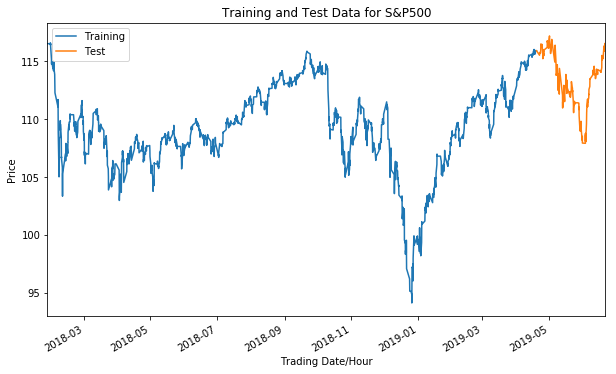

In [40]:
# SET DATA BINNING AND DATE RANGE
num_test_days=45
num_train_days=365
days_for_x_window = 30

# SET THE WINDOW SIZE AND PERIODS_PER_DAY BASED ON InDEX
if stock_df.index.freq == custom_BH_freq():
#     x_window=35
    periods_per_day=7
    x_window = periods_per_day*days_for_x_window
    
elif (stock_df.index.freq == 'B') | (stock_df.index.freq == 'H') :
    periods_per_day=1
    x_window=periods_per_day*days_for_x_window #28

else:
    x_window=30
    periods_per_day=24
print(f'Using x_window={x_window}, periods_per_day={periods_per_day}\n')


# scale the data using MinMaxScaler
if is_var('stock_df_orig')==False:
    stock_df_orig = stock_df.copy()
    
    
    
# TRAIN TEST SPLIT BY DATE
df_train, df_test = train_test_split_by_last_days(stock_df, 
                                                  periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


In [41]:
# RESCALE DATAFRAME USING MINMAXSCALER, RETURN SCALER_LIBRARY FOR LATER    
scaler_library , df_train = make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = transform_cols_from_library(df_test,scaler_library)
df_test.head()

,filled_timebin,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
2019-04-19 15:30:00,1.0,0.969751,0.992575,0.957766,0.979789,1.000000,0.890786,0.296301,0.814578,0.849936,0.970747,0.969751
2019-04-22 09:30:00,0.0,0.952402,0.993266,0.959176,0.981279,1.000773,0.889491,0.292961,0.813876,0.852496,0.959020,0.952402
2019-04-22 10:30:00,0.0,0.956851,0.993880,0.960895,0.982839,1.001678,0.888431,0.288378,0.812701,0.855852,0.958118,0.956851
2019-04-22 11:30:00,0.0,0.960854,0.994758,0.962845,0.984461,1.002698,0.887571,0.285817,0.813010,0.858443,0.960523,0.960854
2019-04-22 12:30:00,0.0,0.963523,0.995701,0.965083,0.986119,1.003785,0.886831,0.282076,0.812866,0.861786,0.963129,0.963523


## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator

In [56]:
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = 35 # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= 1 # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
train_data = df_train['price'].values.reshape(-1,1)
test_data = df_test['price'].values.reshape(-1,1)
train_data_index =  df_train['price'].index
test_data_index = df_test['price'].index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=train_data, targets=train_data,length=n_input, batch_size=batch_size )
test_generator = TimeseriesGenerator(data=test_data, targets=test_data,length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape}) \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

Given the Array: 	(with shape=(1, 35, 1)) 
[0.99688612 0.99688612 1.         0.99154804 0.99154804 0.99154804
 0.99688612 0.98843416 0.94483986 0.93772242 0.9274911  0.92348754
 0.91770463 0.9274911  0.92615658 0.9230427  0.92482206 0.90969751
 0.91459075 0.91770463 0.90480427 0.90613879 0.89279359 0.90258007
 0.90258007 0.92482206 0.92704626 0.91236655 0.90480427 0.87855872
 0.863879   0.8616548  0.85542705 0.84475089 0.81761566]

Predict this y: 
 [[0.80782918]]


## TO DO:
### add AIC and BIC

#### NOTES ON Evaluating Forecast Accuracy
- **Mean Absolute Error, Mean Squared Error, Root Mean Squared Error**
    - A forecast method that minimizes the **MAE** will lead to **forecasts of the median*
    - while minimizing the **RMSE will lead to forecasts of the mean.**
    
- **AIC / BIC**
    - Akaike Information Criterion (AIC)
    - Bayesian Information Criterion (BIC)
    
The AIC evaluates a collection of models and estimates the quality of each model relative to the others. Penalties are provided for the number of parameters used in an effort to thwart overfitting. The lower the AIC and BIC, the better the model should be at forecasting.

These functions are available as

    from from statsmodels.tools.eval_measures import aic, bic
    


## Predicting Price with Keras LSTM - Using ONLY Price
### def predict_model_make_results_dict & def plot_price_vs_preds

## KERAS MODEL 1

In [58]:
# Instantiating clock timer
import bs_ds as bs
clock = bs.Clock(verbose=0)

In [59]:
# defining loss function to use
def my_rmse(y_true,y_pred):
    """RMSE calculation using keras.backend"""
    from keras import backend as kb
    sq_err = kb.square(y_pred - y_true)
    mse = kb.mean(sq_err,axis=-1)
    rmse =kb.sqrt(mse)
    return rmse

# CREATING CALLBACKS
from keras import callbacks
filepath = 'models/model1_weights.{epoch:02d}-{my_rmse:.2f}.hdf5'
checkpoint = callbacks.ModelCheckpoint(filepath=filepath, monitor=my_rmse,mode='min',
                                       save_best_only=True, verbose=1)
early_stop = callbacks.EarlyStopping(monitor=my_rmse,mode='min',patience=1,min_delta=.001,verbose=1)
callbacks = [checkpoint,early_stop]


# creating LOG list for forthcoming results
LOG = [['Test #','Defining difference','RunTime','Test_RMSE_keras','Test_RMSE_price','acc','Train_RMSE_keras','Train_RMSE_price']]

In [81]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from keras import optimizers

# Specifying input shape (size of samples, rank of samples?)
input_shape=(n_input, n_features)

# Create model architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape =input_shape))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

# nadam = optimizers.Nadam(lr=0.002,)

model.compile(loss=my_rmse, optimizer=optimizers.Nadam(), metrics=['acc', my_rmse])#,my_rmse])#,my_rmse])#,metrics=['acc'])optimizer='adam',
display(model.summary())

# start the timer
clock.tic('')

# Fit the model
history = model.fit_generator(train_generator,epochs=4,verbose=2,callbacks=callbacks)

model_results = model.history.history
[print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];
# print('Loss per epoch: ',loss_per_epoch)
# stop clock
clock.toc('')
duration = print(clock._lap_duration_)

# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 35, 50)            10400     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


None

Clock started at 07/04/19 - 08:58:25 PM
Epoch 1/4
 - 88s - loss: 0.0370 - acc: 4.5331e-04 - my_rmse: 0.0370
Epoch 2/4
 - 87s - loss: 0.0210 - acc: 4.5331e-04 - my_rmse: 0.0210
Epoch 3/4
 - 80s - loss: 0.0174 - acc: 4.5331e-04 - my_rmse: 0.0174
Epoch 4/4
 - 82s - loss: 0.0161 - acc: 4.5331e-04 - my_rmse: 0.0161
loss=[0.037  0.021  0.0174 0.0161]
acc=[0.0005 0.0005 0.0005 0.0005]
my_rmse=[0.037  0.021  0.0174 0.0161]
	Lap #1 done @ 07/04/19 - 09:04:03 PM	label:                     	duration: 338.02797 sec)
Total Time: 0:05:38.027970.
0:05:38.027970


Training Data:
	 loss :  0.0111
	 acc :  0.0005
	 my_rmse :  0.0111
Test Data:
	 loss :  0.0122
	 acc :  0.0
	 my_rmse :  0.0122


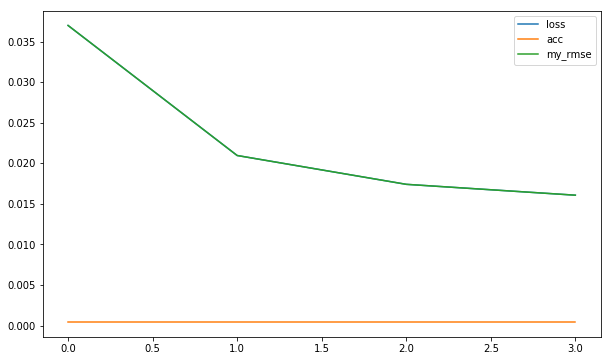

In [82]:
for k,v in model_results.items():
    plt.plot(range(len(v)),v, label=k);
plt.legend()


# # EVALUATE MODEL PREDICTIONS FROM GENERATOR 
model_metrics = model.evaluate_generator(train_generator)
print('Training Data:')
[print('\t',model.metrics_names[i],': ',np.round(model_metrics[i],4)) for i in range(len(model_metrics)) ];

print('Test Data:')
model_metrics = model.evaluate_generator(test_generator)
[print('\t',model.metrics_names[i],': ',np.round(model_metrics[i],4)) for i in range(len(model_metrics)) ];

### def get_true_vs_model_pred_df

Dropping 4693 null values.


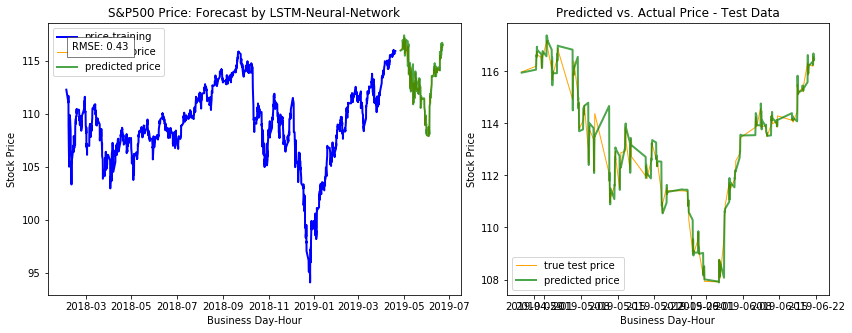

In [83]:
def get_true_vs_model_pred_df(model, test_generator, test_index, train_generator, train_index, scaler=None,
                              inverse_tf=True, plot=True, verbose=2):
    """Accepts a model, the training and testing data TimeseriesGenerators, the test_index and train_index.
    Returns a dataframe with True and Predicted Values for Both the Training and Test Datasets."""
    
    ## GET PREDICTIONS FROM MODEL
    test_predictions = pd.Series(model.predict_generator(test_generator).ravel(), 
                                 index=test_data_index[n_input:], name='Predicted Test Price')

    train_predictions = pd.Series(model.predict_generator(train_generator).ravel(), 
                                  index=train_data_index[n_input:], name='Predicted Training Price')

    # Make a series for true price to plot
    test_true_price = pd.Series( df_test['price'].rename('True Test Price').iloc[n_input:],
                                index= test_data_index[n_input:], name='True Test Price')

    train_true_price = pd.Series(df_train['price'].rename('True Training Price').iloc[n_input:],
                                 index = train_data_index[n_input:], name='True Train Price')
    
    # Combine all 4 into one dataframe
    df_show = pd.concat([train_true_price,train_predictions,test_true_price,test_predictions], axis=1)
    
    
    # CONVERT BACK TO ORIGINAL UNIT SCALE 
    if inverse_tf==True:
        
        if scaler:
            for col in df_show.columns:
                df_show[col] = inverse_transform_series(df_show[col],scaler)
            
        else:
            raise Exception('Must pass a fit scaler to inverse_tf the units.')
            

    # PREVIEW DATA
    if verbose>1:
        df_show.head()
        
    if plot==True:
        plot_true_vs_preds_subplots(df_show['True Train Price'],df_show['True Test Price'], 
                                    df_show['Predicted Test Price'], subplots=True)
        
    return df_show
df_model = get_true_vs_model_pred_df(model, test_generator,test_data_index, train_generator,train_data_index,
                                    scaler_library['price'],inverse_tf=True, plot=True)

### Adding Forecasting Quality Statistic - Thiel's U
- https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s03s04.html

|Thiel's U Value | Interpretation |
| --- | --- |
| <1 | Forecasting is better than guessing|
| 1 | Forecasting is about as good as guessing|
|>1 | Forecasting is worse than guessing|

$$U = \sqrt{\frac{ \sum_{t=1 }^{n-1}\left(\frac{\bar{Y}_{t+1} - Y_{t+1}}{Y_t}\right)^2}{\sum_{t=1 }^{n-1}\left(\frac{Y_{t+1} - Y_{t}}{Y_t}\right)^2}}$$
### ALSO EXAMINE RECOMMENDATIONS FROM THIS FORUM
https://stats.stackexchange.com/questions/351808/lstm-time-series-forecasting-accuracy

In [84]:
def thiels_U(ys_true, ys_pred):
    sum_list = []
    num_list=[]
    denom_list=[]
    for t in range(len(ys_true)-1):
        num_exp = (ys_pred[t+1] - ys_true[t+1])/ys_true[t]
        num_list.append([num_exp**2])
        denom_exp = (ys_true[t+1] - ys_true[t])/ys_true[t]
        denom_list.append([denom_exp**2])
    U = np.sqrt( np.sum(num_list) / np.sum(denom_list))
    return U        

Thiel's U =  1.0329957299604846


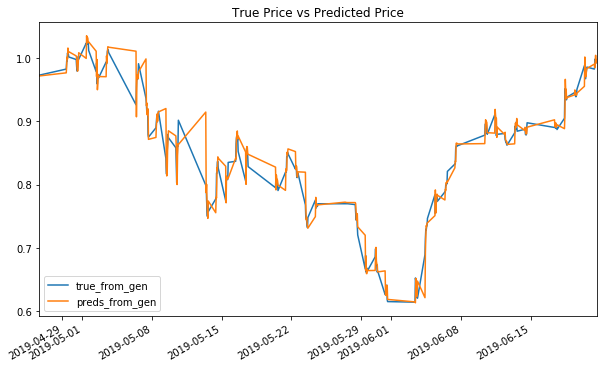

In [85]:
# REVERTING BACK TO ORIGINAL METHOD NOW THAT I UNDERSTAND I NEED TO SHIFT TRUE VALUES -1
# plot_preds_with_thiels_u(mode, test_generator,)
# GET PREDICTIONS FROM TEST_GENERATOR
preds_from_gen = pd.Series(model.predict_generator(test_generator).ravel(), 
                             index=test_data_index[n_input:], name='preds_from_gen')

# EXTRACT TARGET DATA (TRUE VALUES USED))
true_data = [ i[1][0].tolist()[0] for i in test_generator]
true_from_gen = pd.Series(data=true_data,index=test_data_index[n_input:], name='true_from_gen') # get the target values

df_U = pd.concat([true_from_gen,preds_from_gen],axis=1)

df_U.head()
df_U.plot()
plt.legend()

U =thiels_U(df_U['true_from_gen'].values,df_U['preds_from_gen'].values)
plt.title('True Price vs Predicted Price')
print("Thiel's U = ",U)

#### Attempting to see if keras predicitons seem shifted

,U
true_data_shift,
-2,1.722427
-1,1.416817
0,1.032996
1,0.213281
2,1.149624


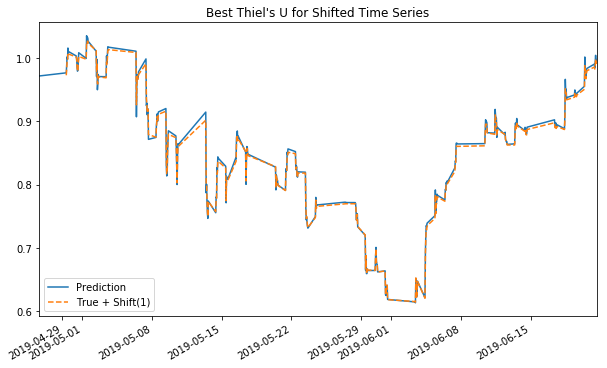

In [87]:
## SHIFT THE TRUE VALUES, PLOT, AND CALC THIEL's U
shift_list = [-2,-1,0,1,2]

def get_u_for_shifts(shift_list,plot_all=False,plot_best=True):
    results=[['true_data_shift','U']]
    
    if plot_all==True:
        df_U['preds_from_gen'].plot(label = 'Prediction')
        plt.legend()
        plt.title('Shifted Time Series vs Predicted')
        
        
    for i,shift in enumerate(shift_list):
        if plot_all==True:
            df_U['true_from_gen'].shift(shift).plot(label = f'True + Shift({shift})')

        df_shift=pd.DataFrame()
        df_shift['true'] = df_U['true_from_gen'].shift(shift)
        df_shift['pred'] =df_U['preds_from_gen']
        df_shift.dropna(inplace=True)

        U =thiels_U(df_shift['true'], df_shift['pred'])
        results.append([shift,U])
    
    
    df_results = bs.list2df(results, index_col='true_data_shift')
    if plot_best==True:
        shift = df_results.idxmin()[0]
        df_U['preds_from_gen'].plot(label = 'Prediction')
        df_U['true_from_gen'].shift(shift).plot(ls='--',label = f'True + Shift({shift})')
        plt.legend()
        plt.title("Best Thiel's U for Shifted Time Series")
#         plt.show()
    return df_results

get_u_for_shifts(shift_list, plot_all=False)

In [2]:
df_U=shift_list
df_U['preds_from_gen'].plot(label = 'Prediction')
df_U['true_from_gen'].shift(shift).plot(ls='--',label = f'True + Shift({shift})')
plt.legend()
plt.xlim(['05-29-2019'])
plt.title("Best Thiel's U for Shifted Time Series")

NameError: name 'shift_list' is not defined

In [ ]:
# # cross correlation 
# from scipy.signal import correlate
# xcorr = correlate(df_U['preds_from_gen'], df_U['true_from_gen'], mode='same')
# x = df_U['true_from_gen']
# y = df_U['preds_from_gen']
# plt.plot(x)
# plt.plot(y)
# plt.figure()
# plt.xcorr(x,y,normed=False)
# # plt.xticks()

In [ ]:
# shift = df_results.idxmin()[0]
# df_U['preds_from_gen'].plot(label = 'Prediction')
# df_U['true_from_gen'].shift(shift).plot(ls='--',label = f'True + Shift({shift})')
# plt.legend()
# plt.title("Best Thiel's U for Shifted Time Series")

In [ ]:
# ## SHIFT THE TRUE VALUES, PLOT, AND CALC THIEL's U
# shift_list = [-2,-1,0,1,2]

# results=[['true_data_shift','U']]

# df_U['preds_from_gen'].plot(ls='--',label = 'Prediction')
# for i,shift in enumerate(shift_list):
# #     df_U['true_from_gen'].shift(shift).plot(label = f'True + Shift({shift})')

#     df_shift=pd.DataFrame()
#     df_shift['true'] = df_U['true_from_gen'].shift(shift)
#     df_shift['pred'] =df_U['preds_from_gen']
#     df_shift.dropna(inplace=True)

#     U =thiels_U(df_shift['true'], df_shift['pred'])
#     if i>0:
#         prior_U = results[-1][1]
#         if prior_U>U:
#             df_shift['true'].plot(alpha=0.6,label = f'True + Shift({shift}): U={U.round(3)}')

#     results.append([shift,U])
# plt.legend()
# bs.list2df(results)

In [ ]:
#  Get test sequence 1

time = 10 # which index in generated data to use
gen_test_x = test_generator[time][0]
gen_test_y = test_generator[time][1]

test_data_match_gen = df_test['price'].values

ix = -5 # how many values in the X sequence to display
show_x = gen_test_x[0].ravel()[ix:]

print(f'For index[{time}]:')
print(f'Last {ix} x in sequence:\n\t',show_x)
print('Y-value from gen: ',gen_test_y)

id_offset = 35
idx_df = time+id_offset

print(f'\nPrior {ix} values from df_test:\n\t', test_data_match_gen[idx_df-5:idx_df])
print('Y-values from df_test: ',test_data_match_gen[idx_df])#34:37])


In [ ]:
## NEW EVAL METHOD USING PREDICTIONS AS PART OF SLIDING WINDOW
    # # GETTING THE FIRST EVAL PATCH AND RESHAPING TO MATCH INPUT
    # first_eval_batch = train_data[-n_input:]
    # current_batch = first_eval_batch.reshape((1, n_input, n_features))
    # test_predictions=[]
    # # LOOP THROUGH ALL TEST DATA
    # for i in range(len(test_data)):

    #     # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    #     current_pred = model.predict(current_batch)[0] 

    #     # store prediction
    #     test_predictions.append(current_pred) 

    #     # UPDATE BATCH TO INCLUDE CURRENT PREDICTION AND DROP OLDEST VALUE FROM ARRAY
    #     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) # axis===ndim

## KERAS MODEL 2


In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM

log_message = 'Document changes here'
# Specifying input shape (size of samples, rank of samples?)
input_shape =  (X_train_in.shape[1],1)

# Create model architecture
model = Sequential()


model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape =input_shape), input_shape = input_shape))
model.add(LSTM(units=50))
# model.add(Dense(50))
model.add(Dense(1))

model.compile(loss=my_rmse, optimizer='adam', metrics=['acc'])#,my_rmse])#,metrics=['acc'])
display(model.summary())

# start the timer
clock.tic('')

# Fit the model
history = model.fit(X_train_in, y_train, epochs=5, verbose=0, validation_split=(0.25))

# stop clock
clock.toc('')
duration = print(clock._lap_duration_)

# from mod4functions_JMI import plot_keras_history
# plot_keras_history(history);


# EVALUATE AND PLOT MODEL PREDICTIONS - TEST DATA
test_keras_rmse, test_acc = model.evaluate(X_test_in, y_test, verbose=0)
print(f'Test data:\trmse={test_keras_rmse}, acc={test_acc}')

# EVALUATE AND PLOT MODEL PREDICTIONS - TRAIN DATA
train_keras_rmse, train_acc = model.evaluate(X_train_in, y_train, verbose=0)
print(f'Train data:\trmse={train_keras_rmse}, acc={train_acc}')



# Get dfs with prices converted back to original units
df_train_price, df_test_price = predict_model_make_results_dict(model, X_test_in, y_test,test_index,
                                                                X_train_in, y_train,train_index, return_as_dfs=True)

# display(df_train_price.head().style.set_caption('df_train_price'), df_test_price.head().style.set_caption('df_test_price'))

# Calculate RMSE using actual prics
test_price_rmse = np.sqrt(mean_squared_error(df_test_price['test_price'],df_test_price['pred_price']))
train_price_rmse = np.sqrt(mean_squared_error(df_train_price['train_price'],df_train_price['pred_train_price']))


# Append log
LOG.append([1,'Initial Model- Using my RMSE with val_split',duration, 
            test_keras_rmse, test_price_rmse, test_acc, train_keras_rmse,train_price_rmse ])

display(bs.list2df(LOG, index_col='Test #'))

df_train_price, df_test_price = predict_model_make_results_dict(model, X_test_in, y_test,test_index,
                                                                X_train_in, y_train, train_index, return_as_dfs=True)
plot_price_vs_preds(df_train_price['train_price'],df_test_price['test_price'],df_test_price['pred_price'])

## BOOKMARK- KERAS MODEL 3 -  WHAT SHOULD TARGETS BE??
ADDING IN OTHER X_DATA
- Evernote clip on input sized https://www.evernote.com/l/AApaMa9-oNtNbJieNggbfNdEsyrKRx1FV8o/

- **USING TIME GENERATOR**
    - https://www.dlology.com/blog/how-to-use-keras-timeseriesgenerator-for-time-series-data/

In [ ]:
[np.shape(x) for x in [train_data,train_target]], [np.shape(x) for x in [test_data,test_target]]

In [ ]:
train_data = np.hstack(df_train.values)#.reshape(-1,1)

df_train.shape, train_data.shape

In [ ]:
# Define shape of data by specifing these vars:
n_input = 35 # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features = df_train.shape[1] # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
train_data_index =  df_train['price'].index
train_data = df_train.values#.reshape(-1,1)
train_target = df_train['price'].values.reshape((len(df_train['price']), 1))
# n_seq2 = in_seq2

test_data_index = df_test['price'].index
test_data = df_test.values
test_target = df_test['price'].values.reshape(-1,1)


## BOOKMARK- WHAT SHOULD TARGETS BE??

## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=train_data, targets=train_target, 
                                      length=n_input, batch_size=batch_size )

test_generator = TimeseriesGenerator(data=test_data, targets=test_target, 
                                     length=n_input, batch_size=batch_size )

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout

# Specifying input shape (size of samples, rank of samples?)
input_shape=(n_input, n_features)

# Create model architecture
model3 = Sequential()

model3.add(LSTM(units=50, return_sequences=True, input_shape =input_shape))
# model.add(Dropout(0.1))
model3.add(LSTM(units=50))
# model.add(Dense(10))
model3.add(Dense(1))

model3.compile(loss=my_rmse, optimizer='adam', metrics=['acc'])#,my_rmse])#,my_rmse])#,metrics=['acc'])optimizer='adam',
display(model3.summary())

# start the timer
clock.tic('')

# Fit the model
history = model3.fit_generator(train_generator,epochs=5,verbose=2)

# stop clock
clock.toc('')
duration = print(clock._lap_duration_)

# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);

In [ ]:
model_results = model3.history.history
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];
# print('Loss per epoch: ',loss_per_epoch)
for k,v in model_results.items():
    plt.plot(range(len(v)),v, label=k);
plt.legend()


# # EVALUATE MODEL PREDICTIONS FROM GENERATOR 
model_metrics = model3.evaluate_generator(train_generator)
print('Training Data:')
[print('\t',model3.metrics_names[i],': ',np.round(model_metrics[i],4)) for i in range(len(model_metrics)) ];

print('Test Data:')
model_metrics = model3.evaluate_generator(test_generator)
[print('\t',model.metrics_names[i],': ',np.round(model_metrics[i],4)) for i in range(len(model_metrics)) ];

In [ ]:
df_model3=get_true_vs_model_pred_df(model3,test_generator, test_data_index,train_generator,train_data_index,scaler_library['price'])

In [ ]:
# # # Creating X,y and index for training data and test data
# train_index =df_train_bins.index
# test_index = df_test_bins.index

# # X_train = df_train_bins['price_bins'].values
# # y_train = df_train_bins['price_labels'].values

# # X_test = df_test_bins['price_bins'].values
# # y_test = df_test_bins['price_labels'].values

# train_generator = TimeseriesGenerator()

In [ ]:
# X1= df_train_bins['price_bins'].values.reshape(-1,1)
# X2 = df_train_bins['ma7_bins'].values.reshape(-1,1)

# print(np.shape(X1), np.shape(X2))
# X12 = np.hstack((X1,X2))
# print(X12.shape)

# X_12_in = np.reshape(X12,(X12.shape[0],X12.shape[1],1))
# print(X_12_in.shape)

In [ ]:
## BOOKMARK TROUBLESHOOTING X MATRIX SHAPE
Xt = df_train_bins['price_bins'].values

def print_array_info(X):
    Xt=X
    print('X type:',type(Xt))
    print(f'X.shape = {Xt.shape}')
    print(f'\nX[0].shape = {Xt[0].shape}')
    print(f'X[0] contains:\n\t',Xt[0])
# print(Xt[0])
# print(Xt[:3])
print_array_info(Xt)

In [ ]:
# # # Converting all X into a 3d  arrays
# columns = df_train_bins.filter(regex=('bins')).columns
# X_train_stack=np.ndarray(shape=(len(df_train_bins),1))

# X_col_stack = []
# print(X_train_stack.shape)

# for col in columns:
    
#     X_train_col = df_train_bins[col].values#.reshape(-1,1)
#     X_train_col = np.vstack(X_train_col)
    
#     X_train_stack =  np.hstack((X_train_stack, X_train_col))
# X_train_in = np.reshape(X_train_stack,(X_train_stack.shape[0],X_train_stack.shape[1],1))
    
# print(X_train_in.shape)

In [ ]:
# columns = df_test_bins.filter(regex=('bins')).columns
# X_test_stack=np.ndarray(shape=(len(df_test_bins),1))

# X_col_stack = []
# print(X_train_stack.shape)

# for col in columns:
    
#     X_test_col = df_test_bins[col].values#.reshape(-1,1)
#     X_test_col = np.vstack(X_test_col)
    
#     X_test_stack =  np.hstack((X_test_stack, X_test_col))
# X_test_in = np.reshape(X_test_stack,(X_test_stack.shape[0],X_test_stack.shape[1],1))
    
# print(X_train_in.shape)

In [ ]:
# X_train_stack.shape

In [ ]:
# # Converting all X and y into 2D arrays
# X_train_stack =  np.vstack(X_train)
# X_train_in = np.reshape(X_train_stack,(X_train_stack.shape[0],X_train_stack.shape[1],1))

# X_test_stack =  np.vstack(X_test)
# X_test_in = np.reshape(X_test_stack,(X_test_stack.shape[0],X_test_stack.shape[1],1))
# X_train_in

# Set True to display array details
# show_array_details = True

# Display details of array data, if desired
# if show_array_details==True:
#     var_dict = {'X_train':X_train_in, 'y_train':y_train,'X_test':X_test_in,'y_test':y_test}
#     for name, arr in var_dict.items():
#         print_array_inf(arr,name)

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM

# Specifying input shape (size of samples, rank of samples?)
input_shape =  (X_train_in.shape[1],1)

# Create model architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, 
                             input_shape =input_shape))#,input_shape=input_shape))
model.add(LSTM(units=50))
model.add(Dense(units=25))
model.add(Dense(1))

model.compile(loss=my_rmse, optimizer='adam', metrics=['acc'])#,my_rmse])#,metrics=['acc'])
display(model.summary())

# start the timer
clock.tic('')

# Fit the model
history = model.fit(X_train_in, y_train, epochs=5, verbose=1, validation_split=(0.05))

# stop clock
clock.toc('')
duration = print(clock._lap_duration_)

from mod4functions_JMI import plot_keras_history
plot_keras_history(history);

In [ ]:
# EVALUATE AND PLOT MODEL PREDICTIONS - TEST DATA
test_keras_rmse, test_acc = model.evaluate(X_test_in, y_test, verbose=1)
print(f'Test data:\trmse={test_keras_rmse}, acc={test_acc}')

# EVALUATE AND PLOT MODEL PREDICTIONS - TRAIN DATA
train_keras_rmse, train_acc = model.evaluate(X_train_in, y_train, verbose=0)
print(f'Train data:\trmse={train_keras_rmse}, acc={train_acc}')



# Get dfs with prices converted back to original units
df_train_price, df_test_price = predict_model_make_results_dict(model, X_test_in, y_test,test_index,
                                                                X_train_in, y_train,train_index, return_as_dfs=True)

display(df_train_price.head().style.set_caption('df_train_price'), df_test_price.head().style.set_caption('df_test_price'))

In [ ]:
df_train_price, df_test_price = predict_model_make_results_dict(model, X_test_in, y_test,test_index,
                                                                X_train_in, y_train, train_index, return_as_dfs=True)
print('Train :',df_train_price.isna().sum())
print('Test :',df_test_price.isna().sum())

df_train_price.dropna(inplace=True)
df_test_price.dropna(inplace=True)

plot_price_vs_preds(df_train_price['train_price'],df_test_price['test_price'],df_test_price['pred_price'],subplots=True)


___

___

## Blog Post Code
- NEW BLOG POST - LSTM TIME SERIES FORECASTING
    - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [ ]:
from keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense
model = Sequential()
input_shape =  (X_train_in.shape[0],X_train_in.shape[1],1)
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=input_shape)) #(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train_in, y_train, epochs=500, verbose=0)
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))

# yhat = model.predict(X_test_in, verbose=0)
# print(yhat)

predictions = pd.Series(predictions.ravel(),name='predicted_price',index=index_test)
true_price =  pd.Series(y_test,name='true_price',index=index_test)

df_predictions = pd.concat([predictions,true_price],axis=1)#, columns=['predicted_price','true_price'], index=index_test)
display(df_predictions.head())

# Plot outcome
mpl.rcParams['figure.figsize']=(12,4)
plt.plot(df_train_bins['price_labels'])
plt.plot(df_predictions)

In [ ]:
STOP
# PREVIEW DATA CONTENTS
# display(df_train_bins.head())
df_train_bins['price_labels'].plot()
df_test_bins['price_labels'].plot()


print('Train Index: ',df_train_bins.index[[0,-1]])
print('Test Index: ',df_test_bins.index[[0,-1]])

In [ ]:
#importing required libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

time_index =stock_df.index.values
stock_df['date'] = time_index# .astype('str')

#creating dataframe
data = stock_df[['date','price']]

new_data = pd.DataFrame(index=range(0,len(stock_df)),columns=['date', 'price'])
display(new_data.head()), display(data.head())

for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['price'][i] = data['price'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)


In [ ]:
new_data

In [ ]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['price'])
plt.plot(valid[['price','Predictions']])
plt.show()

# ✔ BOOKMARK - RESUMING ANALYSIS WITH NEW FUNCTIONS
- Check Evernote log: https://www.evernote.com/l/AApgV1EaL9lEYpujWnwHq62W9QyEKkH4hwA/

- **For LSTM neural network, just using stock market data itself, which would be:**
    - **Training Data:**
         - `X_train = df_train_bins['price_bins']`
         - `y_train = df_train_bins['price_labels']`
     - **Testing Data:**
         - `X_test = df_test_bins['price_bins']`
         - `y_test = df_test_bins['price_labels']`    

### Hyperparameter tuning for Holt-Winters

In [ ]:
PAUSEW

In [ ]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # parameter tuning for seasonal_periods
# params={}
# # params['seasonal_periods'] = [7]#,70,140]
# period = 7

# params['trend'] = ['mul']#,'add']
# params['seasonal'] = ['mul','add']

# results_list = ['i','seasonal_periods','MAE','MSE','RMSE']

# clock.tic('Start Search')
# for i, trend in enumerate(params['trend']):
#     print("---"*20,"\nTrend:",trend)
    
#     for seasonal in params['seasonal']:
#         print('Seasonal:',seasonal)
#         fitted_model = ExponentialSmoothing(train_data['price'],trend=trend,seasonal=seasonal,seasonal_periods=period).fit()
#         test_predictions = fitted_model.forecast(35).rename('HW Forecast')

#         report = evaluation_report(test_data.iloc[:35], test_predictions)

#         results = i,period,report['mae'],report['mse'],report['rmse']
#         clock.lap('')
#         results_list.append([results])

#         ax = plot_holt_winters(train_data, test_data, test_predictions)
#         ax.set_title(f'Holt-Winters Forecast: seasonal: {seasonal}, trend:{trend}')
#         ax.text
#         plt.show()
#         [print(k,v) for k,v in report.items()]
# clock.toc('')

# Twitter Processing 

- NLP Pre-Processing 
    - stopword removal and regexp tokenization
    - extraction and removal of hashtags, @'s and urls' using regex
- Word Frequency Disributions and Bigrams
    - Word Frequencies - tweet, #'s
    - Bigrams - tweets
    - WordClouds - tweet, #'s, @'s

- Upper to lower case ratio

### NLP Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = '/content/drive/My Drive/Colab Notebooks/Mod 5 Project/'

file = folder_path +'data/trump_tweets_01202017_06202019.csv'
df = pd.read_csv(file, encoding='utf-8')
df.rename(axis=1,mapper={'text':'content','created_at':'date'},inplace=True)
df['date']=pd.to_datetime(df['date'])

display(df.head())
print(' First tweet:',df.date.min(),'\n','Last tweet:',df.date.max())
print('\nRange of Dates: ',df.date.max() - df.date.min())

In [ ]:
# Generate Stopwords List from nltk + punctuation + custom list
from nltk import regexp_tokenize

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

    if tokenize==True:
        from nltk import regexp_tokenize
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

# # Remove stopwords using function apply_stopwords)
# df['text_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))

# # Tokenize using regexp_tokenize from nltk
# df['tokens_stopped'] = df['content'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# Save 'hashtags' column containing all hastags
import re
df['content_raw'] = df['content'].copy()

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df['has_RT']=df['content_raw'].str.contains('RT')
df['starts_RT']=df['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df['content_min_clean'] =  df[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# Issue of empty entries for hashtags interfering with joining.
def empty_lists_to_strings(x):
    """Takes a series and replaces any empty lists with an empty string instead."""
    if len(x)==0:
        return ' '
    else:
        return ' '.join(x) #' '.join(tokens)
    
    
# Apply empty_lists_to_strings to hashtags
df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

# Apply empty_lists_to_strings to mentions
df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))

### Word Frequency Distributions & Bigrams

In [ ]:
# FOR TWEET WORD CONTENT
column = 'content_stopped'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)
    

In [ ]:
# MAKE BIGRAMS
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
import mod4functions_JMI as jmi

bigram_measures =BigramAssocMeasures()

tweet_finder = BigramCollocationFinder.from_words(TEXT['tokens'])
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

df_1 = quick_table(tweets_scored[:25], col_names =['Bigram','Frequency'],
                       caption='Tweet Bigrams', display_df=False)
df_1['Bigram'] = df_1['Bigram'].apply(lambda x: ' '.join(x))
df_1.set_index('Bigram',inplace=True)
df_1.columms=['Frequency']
df_1

In [ ]:
# CREATING HASHTAG DICT
column = 'hashtag_strings'
tag_pattern ='(#\w*)'
tags_combined = df[column]
tags_combined = ' '.join(tags_combined)
tags_tokenized = regexp_tokenize(tags_combined, tag_pattern)

TAGS = dict()
TAGS['tokens'] = tags_tokenized
TAGS['text'] = tags_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tags = FreqDist(TAGS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tags.plot(25)

In [ ]:
# CREATING METNION DICT
column = 'mention_strings'
at_pattern ='(@\w*)'
ats_combined = df[column]
ats_combined = ' '.join(ats_combined)
ats_tokenized = regexp_tokenize(ats_combined, at_pattern)

ATS = dict()
ATS['tokens'] = ats_tokenized
ATS['text'] = ats_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_ats = FreqDist(ATS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_ats.plot(25)

### Word Clouds

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import mask images for shaped wordclouds
from PIL import Image
import numpy as np

mask_folder_path = '/content/drive/My Drive/Images/fig_masks/'
## Twitter Bird masks
mask_f_right = np.array(Image.open(mask_folder_path+'twitter1.png'))
mask_f_left = np.array(Image.open(mask_folder_path+'twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-03.jpg'))

In [ ]:
# Define wordcloud plotting function
def plot_fit_cloud(troll_cloud,label1='Most Common Words',figsize=(4,4)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ax.imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax.axis("off")
    ax.set_title(label1, fontsize=20)
    return fig, ax

#### Creating multiple kinds of wordclouds
- tweet words, tweet bigrams
- #'s, @'s


In [ ]:
# Instantiazting wordcloud and defining properties
from wordcloud import WordCloud

max_font_size=100
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
# collocations=False

wordcloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=False,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)

wordcloud.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud)

In [ ]:
# Plotting bigram wordcloud
wordcloud_bigram= WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                            background_color=background_color, collocations=True,normalize_plurals=False,
                            stopwords=[], mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)
wordcloud_bigram.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud_bigram, 'Most Common Bigrams')

In [ ]:
# Combine and Tokenize hashtags
tags = df['hashtag_strings']
tags = ' '.join(tags)
tags_tokens = regexp_tokenize(tags,'(#\w*)')


# WordClouds for Hashtags
max_font_size=300
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'


tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


tag_cloud.generate(' '.join(tags_tokens))
plot_fit_cloud(tag_cloud,'Most Common Hashtags',figsize=(5,5))

In [ ]:
# Combine and Tokenize hashtags
mentions = df['mention_strings']
mentions = ' '.join(mentions)
mentions_tokens = regexp_tokenize(mentions,'(@\w*)')


# WordClouds for Mentions
max_font_size=300
width=500
height=500
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'

mentions_cloud = WordCloud(
    
    max_font_size=max_font_size, width=width, height=height,
    
    max_words=max_words, background_color=background_color,
    
    stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
    
    mask=mask_at, contour_color='black', contour_width=2
)#, include_numbers=True)


mentions_cloud.generate(' '.join(mentions_tokens))

plot_fit_cloud(mentions_cloud,"Most Common @'s",figsize=(3,3))

### Additional Tweet Processing and Feature Extraction

In [ ]:
def case_ratio(msg):
    """Accepts a twitter message (or used with .apply(lambda x:)).
    Returns the ratio of capitalized characters out of the total number of characters."""
    import numpy as np
    msg_length = len(msg)
    test_upper = [1 for x in msg if x.isupper()]
    test_lower = [1 for x in msg if x.islower()]
    test_ratio = np.round(sum(test_upper)/msg_length,5)
    return test_ratio

# df['case_ratio'] = df['content'].apply(lambda x: case_ratio(x))
# df.sort_values('case_ratio',ascending=False).head()

### Sentiment Analysis

In [ ]:
# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores'):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)
    return df

In [ ]:
import bs_ds as bs
import mod4functions_JMI as jmi
# from bs_ds.imports import *

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

source_column='content_min_clean'
df['sentiment_scores'] = df[source_column].apply(lambda x: sid.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda dict: dict['compound'])
df['sentiment_class'] = df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')


# Separate Scores into separate columns in df
df = get_group_sentiment_scores(df)

In [ ]:

print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_sent_class = df['sentiment_class'].value_counts()
plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
print('\tNormalized Troll Classes:\n',plot_sent_class_norm)


with plt.style.context('seaborn-notebook'):
    boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
    boxplot.set_xticklabels(['Negative','Neutral','Positive']);
    boxplot.set_title('Sentiment Scores By Word Type')
    boxplot.set_ylabel('Sentiment Score')

# COMBINING TWITTER AMD STOCK MARKET DATAFRAMES

In [ ]:
try: twitter_df
except NameError: twitter_df = None
    
if twitter_df is None:
    print('loading twitter_df')
    twitter_df = pd.read_csv('data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
    twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

    # Fill in missing values before merging with stock data
    twitter_df.fillna('', inplace=True)
    twitter_df.sort_index(ascending=True, inplace=True)

    # Check header and daterange of index
    display(twitter_df.head(2))
    twitter_df.index[[0,-1]]
else:
    print('twitter_df already exists.')

### WRITING FUNCTION TO BIN TWEETS BY HOUR PRE-NLP (and add Freq column)

In [ ]:
CBH = custom_BH_freq()
CBH

In [ ]:
twitter_df.index

In [ ]:
test_twitter_df = twitter_df['2019-05-01':'2019-06-01']
test_twitter_df.index

In [ ]:
# thoughts on how to bin twitter data

df=pd.DataFrame()
df['time_index'] = test_twitter_df.index.to_list()
df.reset_index(inplace=True)

content = test_twitter_df['content_stopped'].values
df['content_stopped'] = content#twitter_df['content_stopped']

df.reset_index(inplace=True)
df.drop(['level_0','index'], inplace=True, axis=1)
df.head()
print(df.dtypes)

# df.reindex('time_index')
# df=df.asfreq('S')
# df.head()

In [ ]:
df['time_index'] = pd.to_datetime(test_twitter_df.index,unit='S')#freq='S')
df['time_index']

In [ ]:
df_sec = set_timeindex_freq(test_twitter_df,freq='S')

In [ ]:
# index_to_bin = df.index
# index_to_bin

In [ ]:
df.head()

### USING ROLLBACK - PANDAS GUIDE
- from the https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

```python
In [148]: ts = pd.Timestamp('2018-01-06 00:00:00')

In [149]: ts.day_name()
Out[149]: 'Saturday'

# BusinessHour's valid offset dates are Monday through Friday
In [150]: offset = pd.offsets.BusinessHour(start='09:00')

# Bring the date to the closest offset date (Monday)
In [151]: offset.rollforward(ts)
Out[151]: Timestamp('2018-01-08 09:00:00')

# Date is brought to the closest offset date first and then the hour is added
In [152]: ts + offset
Out[152]: Timestamp('2018-01-08 10:00:00')
```

In [ ]:
CBH_off = pd.offsets.CustomBusinessHour(start='9:30', end='4:30')
CBH_off

In [ ]:
df.loc[df.index.duplicated()]
df.index

In [ ]:
# index_to_bin = df.index #.round('T')

df_sec = df.asfreq('S')
index_to_bin = df_sec.index
index_to_bin

In [ ]:
CBH_off.rollforward(index_to_bin)

In [ ]:
index_to_bin = df.index #.round('T')
df['index_to_bin'] = index_to_bin #.index.round('T')

CBH_index = index_to_bin.as
print(df['index_to_bin'].dtypes)
# CBH_index = df['index_to_bin'].asfreq(CBH)
df.head()

In [ ]:
display(df.head())
df


In [ ]:
# twitter_df['group_bin']  = twitter_df.index_to_bin.round('H')
# groups = twitter_df['group_bin'].unique().sort_values()

In [ ]:
# twitter_df['index_to_bin'] = twitter_df.asfreq(CBH).index
# twitter_df['group_bin']  = twitter_df.index_to_bin.round('H')
# groups = twitter_df['group_bin'].unique().sort_values()

In [ ]:
# Make a new_df for resulting output
new_df = pd.DataFrame()
new_df['timebins'] = groups #or make a set

for group in groups:

In [ ]:
# Round inde to the nearest minute
twitter_df.index = twitter_df.index.round('T')

# Make datetime index a periodindex
twitter_df = twitter_df.to_period('T')

display(twitter_df.head(2))
twitter_df.index[[0,-1]]


# Select only the stock periods that have corresponding tweets (post-inaugauration)
stock_periods=stock_periods['2017-01-20':]

# Confirm the endpoints of the stocks and tweets before combining
stock_periods.index[[0,-1]], twitter_df.index[[0,-1]]

# Make stock_periods a dataframe with 'price' column title
stock_periods_df = pd.DataFrame(stock_periods,columns=['price'], copy=True)

display(stock_periods_df.head(2))
display(twitter_df.head(2))

In [ ]:
df = twitter_df.merge(stock_periods_df, how='outer', on='date', sort=True)
df[['content','price']].isna().sum()

In [ ]:
# Apply forward filling for price column to give all tweets a S&P price value
df['price'] = df['price'].fillna(method='ffill',axis=0)
df.head()

# Processed Twitter Data 

In [ ]:
twitter_df = pd.read_csv(folder_path+'data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

# Fill in missing values before merging with stock data
twitter_df.fillna('', inplace=True)
twitter_df.sort_index(ascending=True, inplace=True)

# Check header and daterange of index
display(twitter_df.head(2))
twitter_df.index[[0,-1]]